In [2]:
### Importing all the required packages and loading csv files
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
from sklearn import preprocessing
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV #for fine tuning
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Dataset/Dataset.txt')
data_attack = pd.read_csv('Dataset/Attack_types.txt')


# Create new DataFrame with 'Attack category' column
att_cat = data[['attack_category']].copy()

# View the resulting DataFrame
att_cat.head()



attack_category
0          normal
1          normal
2         neptune
3          normal
4          normal

In [3]:
### seperating attack types and categories in attacktype.txt
data_attack[['attack_category', 'attack_type']] = data_attack['attack_category attack_type'].str.split(' ', expand=True)
data_attack.drop('attack_category attack_type',axis = 1, inplace=True)
data_attack.head()

attack_category attack_type
0         apache2         dos
1            back         dos
2        mailbomb         dos
3    processtable         dos
4   snmpgetattack         dos

In [4]:
data.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   

   attack_category  occurance  
0           normal         20  
1           normal         15  
2          neptune         19  
3           normal         21  
4           normal         21  

[5 rows x 43 columns]

In [5]:
# my_dict = data_attack.set_index('category')['type'].to_dict()
# my_dict
# merging/joining both datafarmes so that mapping could be done
data = data.merge(data_attack, on='attack_category', how='left')


In [6]:
data.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_diff_srv_rate  \
0               0       0    0  ...                    0.03   
1               0       0    0  ...                    0.60   
2               0       0    0  ...                    0.05   
3               0       0    0  ...                    0.00   
4               0       0    0  ...                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate  attack_category  occurance  attack_type  
0                      0.00           normal         20          NaN  
1                      0.00           normal         15          NaN  
2                      0.00          neptune         19          dos  
3                      0.01           normal         21          NaN  
4                      0.00           normal         21          NaN  

[5 rows x 44 columns]

In [7]:
# for tye in target['attack_category']:
#         target['attack'] = ''

# target.head()
    


In [8]:
# for tye in target['attack_category']:
#         pass
# counting value= normal in the dataset
data['attack_category'].value_counts()['normal']


67343

In [9]:
# checking null values
nulls =data.isnull().sum()
print(nulls , data.shape)

duration                           0
protocol_type                      0
service                            0
flag                               0
src_bytes                          0
dst_bytes                          0
land                               0
wrong_fragment                     0
urgent                             0
hot                                0
num_failed_logins                  0
logged_in                          0
num_compromised                    0
root_shell                         0
su_attempted                       0
num_root                           0
num_file_creations                 0
num_shells                         0
num_access_files                   0
num_outbound_cmds                  0
is_host_login                      0
is_guest_login                     0
count                              0
srv_count                          0
serror_rate                        0
srv_serror_rate                    0
rerror_rate                        0
s

In [10]:
# replacing all the null values in attack type with normal because no attack occured
data['attack_type'] = data['attack_type'].replace(np.nan,'normal')

In [11]:
data['attack_type'].value_counts()['normal']

67343

In [12]:
# null values removed 
nulls =data.isnull().sum()
print(nulls , data.shape)


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [13]:
data.tail()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
125979         0           tcp   private   S0          0          0     0   
125980         8           udp   private   SF        105        145     0   
125981         0           tcp      smtp   SF       2231        384     0   
125982         0           tcp    klogin   S0          0          0     0   
125983         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_diff_srv_rate  \
125979               0       0    0  ...                    0.06   
125980               0       0    0  ...                    0.01   
125981               0       0    0  ...                    0.06   
125982               0       0    0  ...                    0.05   
125983               0       0    0  ...                    0.03   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
125979                         0.00                          0.0   
125980                         0.01                          0.0   
125981                         0.00                          0.0   
125982                         0.00                          0.0   
125983                         0.30                          0.0   

        dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
125979                  1.00                       1.0                  0.00   
125980                  0.00                       0.0                  0.00   
125981                  0.72                       0.0                  0.01   
125982                  1.00                       1.0                  0.00   
125983                  0.00                       0.0                  0.00   

        dst_host_srv_rerror_rate  attack_category  occurance  attack_type  
125979                       0.0          neptune         20          dos  
125980                       0.0           normal         21       normal  
125981                       0.0           normal         18       normal  
125982                       0.0          neptune         20          dos  
125983                       0.0           normal         21       normal  

[5 rows x 44 columns]

In [14]:
# dropping attack category column because it is no longer needed
data.drop('attack_category' ,axis = 1, inplace=True)
data.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   

   occurance  attack_type  
0         20       normal  
1         15       normal  
2         19          dos  
3         21       normal  
4         21       normal  

[5 rows x 43 columns]

In [15]:
for i in data:
    if data[i].dtype == 'object':
        print(f" {i} = {data[i].unique()}")

 protocol_type = ['tcp' 'udp' 'icmp']
 service = ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
 flag = ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
 attack_type = ['normal' 'dos' 'r2l' 'probe' 'u2r']


In [16]:
data.shape


(125984, 43)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125984 entries, 0 to 125983
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125984 non-null  int64  
 1   protocol_type                125984 non-null  object 
 2   service                      125984 non-null  object 
 3   flag                         125984 non-null  object 
 4   src_bytes                    125984 non-null  int64  
 5   dst_bytes                    125984 non-null  int64  
 6   land                         125984 non-null  int64  
 7   wrong_fragment               125984 non-null  int64  
 8   urgent                       125984 non-null  int64  
 9   hot                          125984 non-null  int64  
 10  num_failed_logins            125984 non-null  int64  
 11  logged_in                    125984 non-null  int64  
 12  num_compromised              125984 non-null  int64  
 13 

In [18]:
data.describe()

duration     src_bytes     dst_bytes           land  \
count  125984.000000  1.259840e+05  1.259840e+05  125984.000000   
mean      287.120150  4.556280e+04  1.978262e+04       0.000198   
std      2604.402926  5.870075e+06  4.021094e+06       0.014085   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  0.000000e+00  0.000000e+00       0.000000   
50%         0.000000  4.400000e+01  0.000000e+00       0.000000   
75%         0.000000  2.760000e+02  5.160000e+02       0.000000   
max     42908.000000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125984.000000  125984.000000  125984.000000      125984.000000   
mean         0.022685       0.000111       0.204423           0.001222   
std          0.253519       0.014365       2.149887           0.045237   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.000000       0.000000           0.000000   
50%          0.000000       0.000000       0.000000           0.000000   
75%          0.000000       0.000000       0.000000           0.000000   
max          3.000000       3.000000      77.000000           5.000000   

           logged_in  num_compromised  ...  dst_host_srv_count  \
count  125984.000000    125984.000000  ...       125984.000000   
mean        0.395709         0.279353  ...          115.643391   
std         0.489004        23.941038  ...          110.702693   
min         0.000000         0.000000  ...            0.000000   
25%         0.000000         0.000000  ...           10.000000   
50%         0.000000         0.000000  ...           63.000000   
75%         1.000000         0.000000  ...          255.000000   
max         1.000000      7479.000000  ...          255.000000   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count           125984.000000           125984.000000   
mean                 0.521276                0.082944   
std                  0.448952                0.188915   
min                  0.000000                0.000000   
25%                  0.050000                0.000000   
50%                  0.510000                0.020000   
75%                  1.000000                0.070000   
max                  1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                125984.000000                125984.000000   
mean                      0.148424                     0.032540   
std                       0.309041                     0.112559   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.060000                     0.020000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count         125984.000000             125984.000000         125984.000000   
mean               0.284478                  0.278511              0.118822   
std                0.444780                  0.445665              0.306546   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                1.000000                  1.000000              0.000000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate      occurance  
count             125984.000000  125984.000000  
mean                   0.120229      19.503707  
std                    0.319447       2.292028  
min                    0.000000       0.000000  
25%                    0.000000      18.000000  
50%                   

In [19]:
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df)

number of duplicate rows:          duration protocol_type service flag  src_bytes  dst_bytes  land  \
6087           0           tcp   imap4   SF          0          0     0   
12293          0           tcp   imap4   SF          0          0     0   
17675         41           tcp   imap4   SF       1334        162     0   
17875          0           tcp   imap4   S1       1492     649186     0   
21548          0           tcp   imap4   SH          0          0     0   
26928          0          icmp   eco_i   SF          8          0     0   
34013          0          icmp   eco_i   SF          8          0     0   
58310          0           tcp   imap4   SH          0          0     0   
64560          0           tcp   imap4   SH          0          0     0   
64813          0           tcp   imap4   SF          0          0     0   
79823          0          icmp   eco_i   SF          8          0     0   
79867          0          icmp   ecr_i   SF          8          0     0  

In [20]:
data.count() 

duration                       125984
protocol_type                  125984
service                        125984
flag                           125984
src_bytes                      125984
dst_bytes                      125984
land                           125984
wrong_fragment                 125984
urgent                         125984
hot                            125984
num_failed_logins              125984
logged_in                      125984
num_compromised                125984
root_shell                     125984
su_attempted                   125984
num_root                       125984
num_file_creations             125984
num_shells                     125984
num_access_files               125984
num_outbound_cmds              125984
is_host_login                  125984
is_guest_login                 125984
count                          125984
srv_count                      125984
serror_rate                    125984
srv_serror_rate                125984
rerror_rate 

In [21]:
data.shape

(125984, 43)

In [22]:
data = data.drop_duplicates()

In [23]:
data.shape

(125964, 43)

In [24]:
#standardize it

In [25]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
categories = ['service','protocol_type','flag']
for category in categories:
# Using .fit_transform function to fit label
# encoder and return encoded label
    label = le.fit_transform(data[category])
    data.drop(category,axis=1)
    data[category] = label
 
 #printing label
    print(label)
data.head()

[20 44 49 ... 54 30 20]
[1 2 1 ... 1 1 1]
[9 9 5 ... 9 5 9]


duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       20     9        491          0     0   
1         0              2       44     9        146          0     0   
2         0              1       49     5          0          0     0   
3         0              1       24     9        232       8153     0   
4         0              1       24     9        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   

   occurance  attack_type  
0         20       normal  
1         15       normal  
2         19          dos  
3         21       normal  
4         21       normal  

[5 rows x 43 columns]

In [26]:
x = data.drop('attack_type',axis=1)
y = data['attack_type']

In [28]:
#Before standardization
for col in x.select_dtypes(exclude='object').columns:
    mean = x[col].mean()
    median = x[col].median()
    mode = x[col].mode()[0]
    var = x[col].var()
    std = x[col].std()
    print("Feature:" + str(col))
    print("Mean:" + str(mean))
    print("Median:" + str(median))
    print("Mode:" + str(mode))
    print("Variance: " + str(var))
    print("Standard Deviation:" + str(std))

Feature:duration
Mean:287.16516623797276
Median:0.0
Mode:0
Variance: 6783978.78579199
Standard Deviation:2604.607222940148
Feature:protocol_type
Mean:1.053277126798133
Median:1.0
Mode:1
Variance: 0.1819380072089243
Standard Deviation:0.426541917294097
Feature:service
Mean:31.227660283890636
Median:24.0
Mode:24
Variance: 267.20629380086905
Standard Deviation:16.346445907317868
Feature:flag
Mean:6.979851386110317
Median:9.0
Mode:9
Variance: 7.232908574882686
Standard Deviation:2.689406732884166
Feature:src_bytes
Mean:45569.99812644882
Median:44.0
Mode:0
Variance: 34463250244700.176
Standard Deviation:5870540.881784248
Feature:dst_bytes
Mean:19780.527619002256
Median:0.0
Mode:0
Variance: 16171760942915.848
Standard Deviation:4021412.804340764
Feature:land
Mean:0.00019846940395668603
Median:0.0
Mode:0
Variance: 0.00019843158915634808
Standard Deviation:0.014086574784394824
Feature:wrong_fragment
Mean:0.02268902226032835
Median:0.0
Mode:0
Variance: 0.06428200959313435
Standard Deviation:0.2

In [29]:
#standardize it now
from sklearn import preprocessing
standard = preprocessing.scale(x)
standardized_x = pd.DataFrame(standard, columns= x.columns)
print(standardized_x)

        duration  protocol_type   service      flag  src_bytes  dst_bytes  \
0      -0.110253      -0.124905 -0.686859  0.751153  -0.007679  -0.004919   
1      -0.110253       2.219539  0.781356  0.751153  -0.007738  -0.004919   
2      -0.110253      -0.124905  1.087234 -0.736170  -0.007763  -0.004919   
3      -0.110253      -0.124905 -0.442157  0.751153  -0.007723  -0.002891   
4      -0.110253      -0.124905 -0.442157  0.751153  -0.007729  -0.004814   
...          ...            ...       ...       ...        ...        ...   
125959 -0.110253      -0.124905  1.087234 -0.736170  -0.007763  -0.004919   
125960 -0.107182       2.219539  1.087234  0.751153  -0.007745  -0.004883   
125961 -0.110253      -0.124905  1.393112  0.751153  -0.007382  -0.004823   
125962 -0.110253      -0.124905 -0.075103 -0.736170  -0.007763  -0.004919   
125963 -0.110253      -0.124905 -0.686859  0.751153  -0.007737  -0.004919   

            land  wrong_fragment    urgent       hot  ...  dst_host_srv_cou

In [30]:
#Univariate Analysis

In [31]:
#After Standardization
for col in standardized_x.select_dtypes(exclude='object').columns:
    mean = standardized_x[col].mean()
    median = standardized_x[col].median()
    mode = standardized_x[col].mode()[0]
    var = standardized_x[col].var()
    std = standardized_x[col].std()
    print("Feature:" + str(col))
    print("Mean:" + str(mean))
    print("Median:" + str(median))
    print("Mode:" + str(mode))
    print("Variance: " + str(var))
    print("Standard Deviation:" + str(std))

Feature:duration
Mean:3.6552641450933993e-17
Median:-0.11025320961468675
Mode:-0.11025320961468675
Variance: 1.0000079388391832
Standard Deviation:1.0000039694117135
Feature:protocol_type
Mean:-2.447983421862512e-16
Median:-0.12490528156052198
Mode:-0.12490528156052198
Variance: 1.0000079388391827
Standard Deviation:1.0000039694117133
Feature:service
Mean:-2.6850397115192252e-17
Median:-0.4421566017732566
Mode:-0.4421566017732566
Variance: 1.0000079388391827
Standard Deviation:1.0000039694117133
Feature:flag
Mean:5.511100416290511e-17
Median:0.7511532591891754
Mode:0.7511532591891754
Variance: 1.0000079388391836
Standard Deviation:1.0000039694117138
Feature:src_bytes
Mean:2.256335892032962e-19
Median:-0.0077550228768770895
Mode:-0.007762517957064785
Variance: 1.000007938839183
Standard Deviation:1.0000039694117133
Feature:dst_bytes
Mean:7.192070655855068e-19
Median:-0.004918820100913004
Mode:-0.004918820100913004
Variance: 1.0000079388391825
Standard Deviation:1.000003969411713
Feature

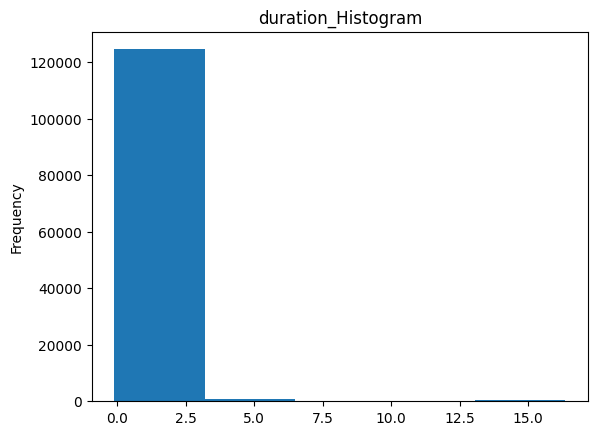

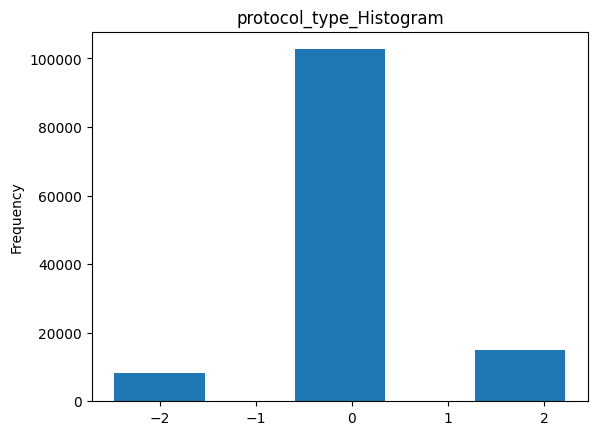

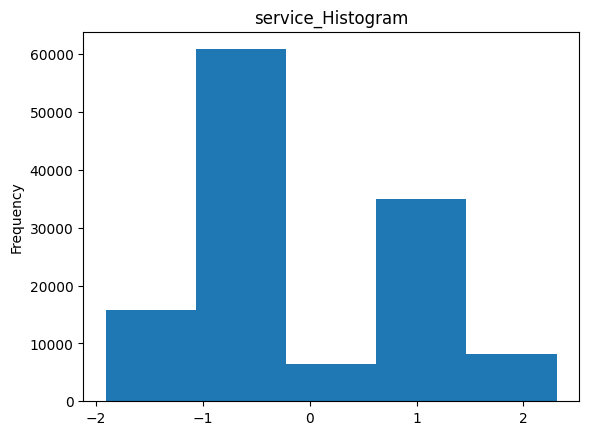

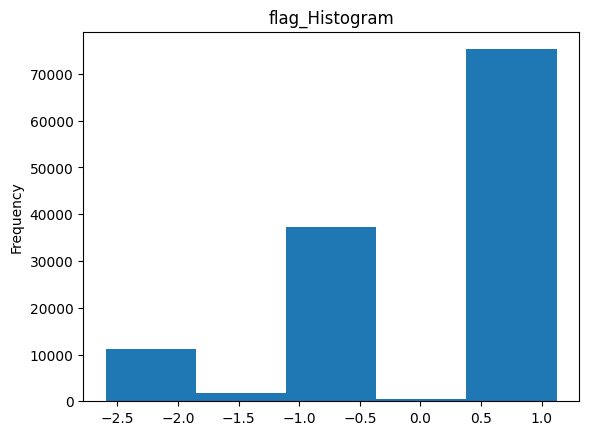

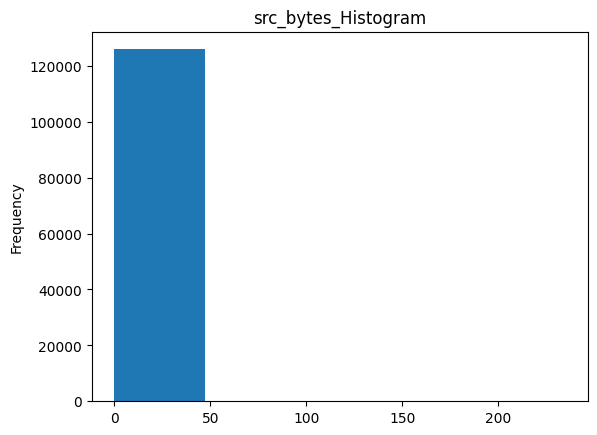

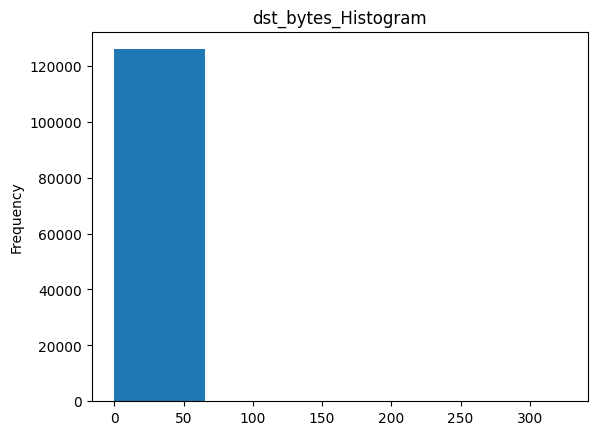

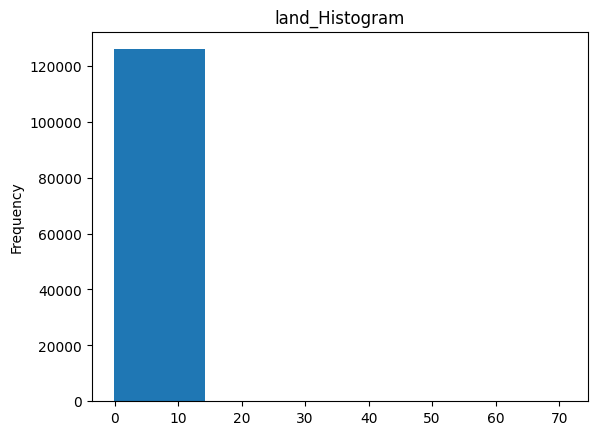

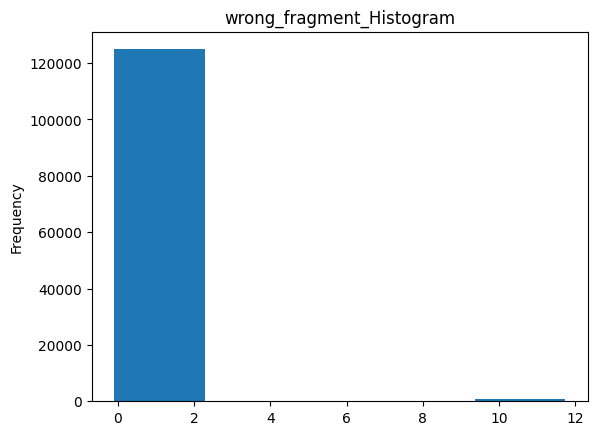

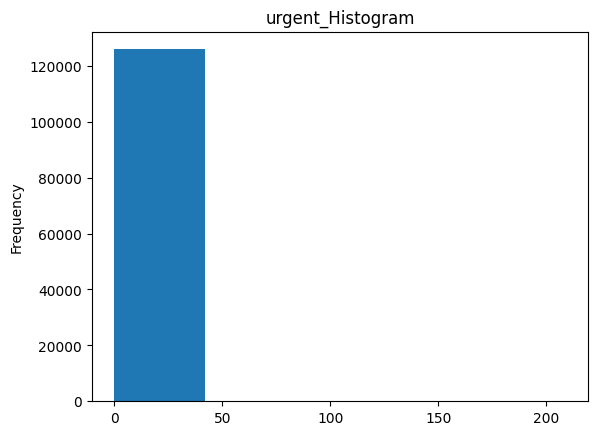

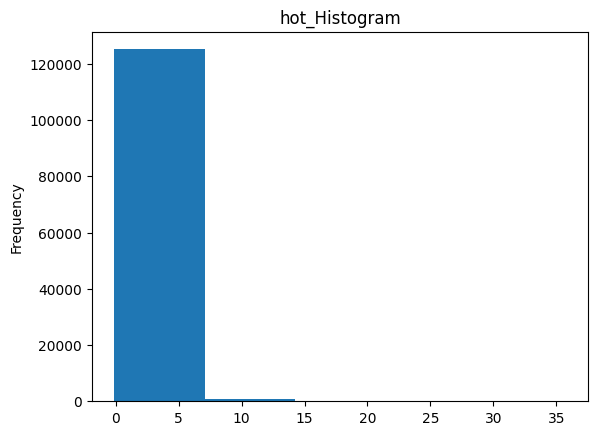

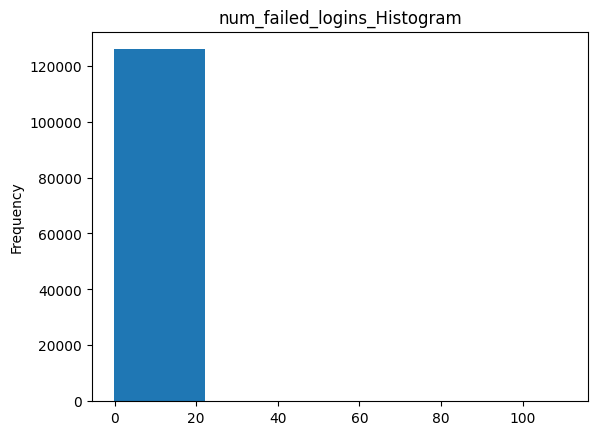

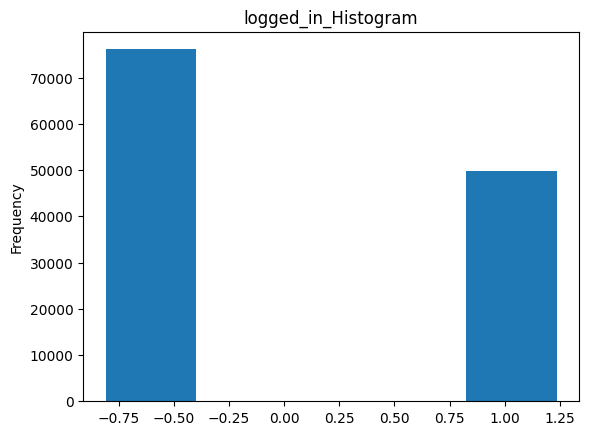

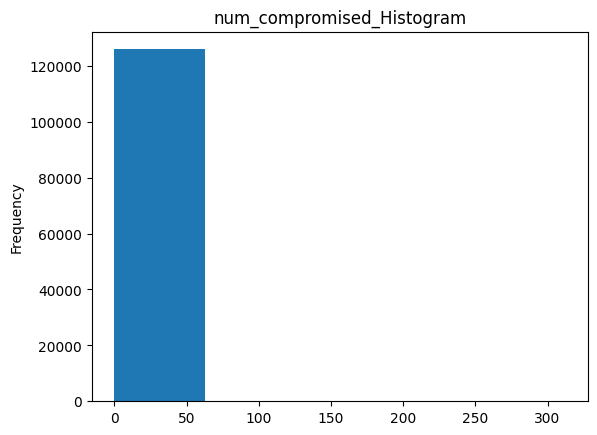

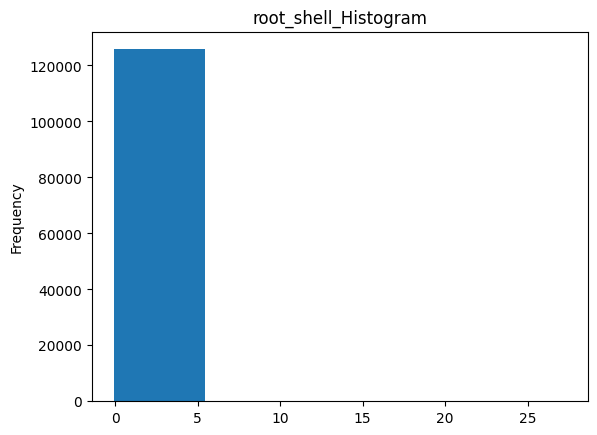

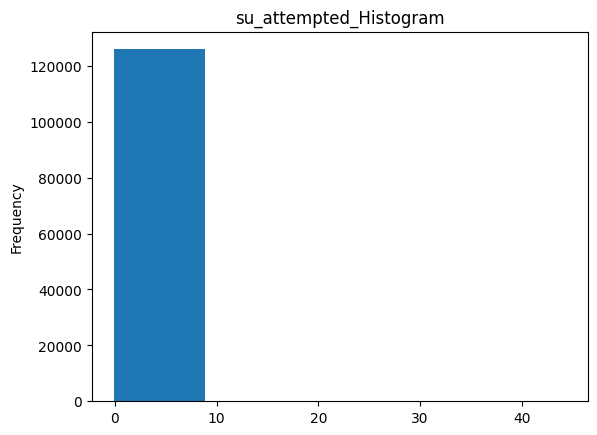

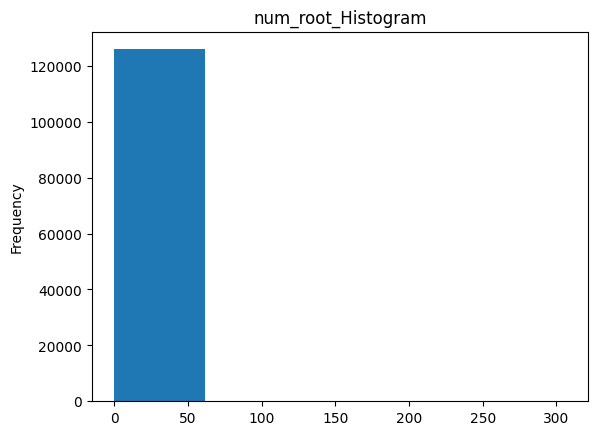

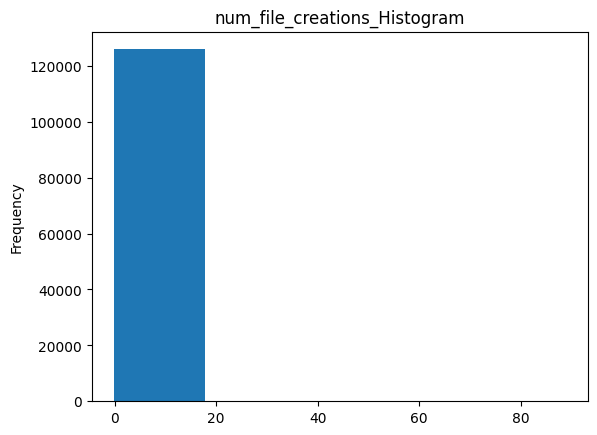

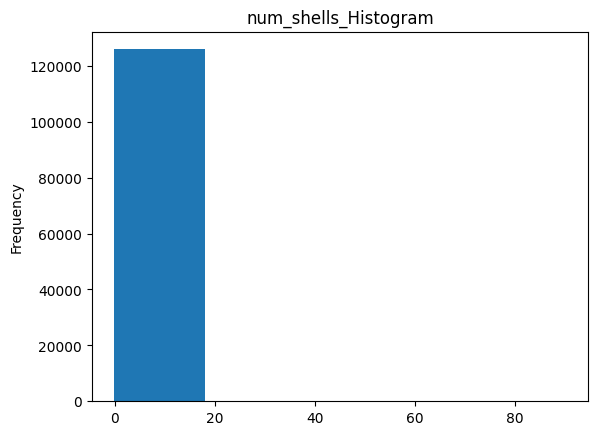

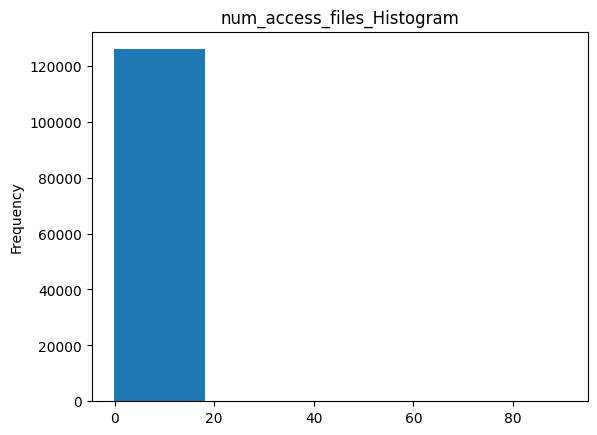

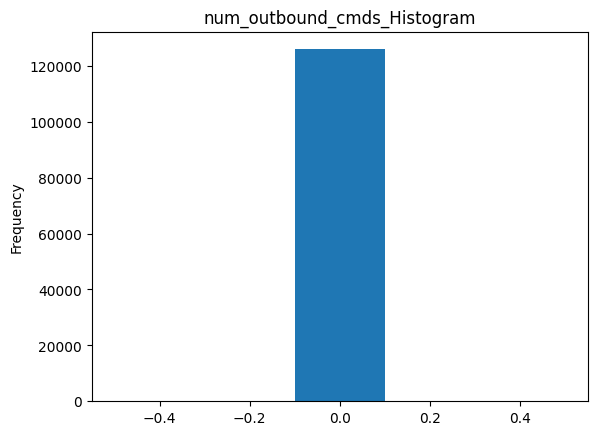

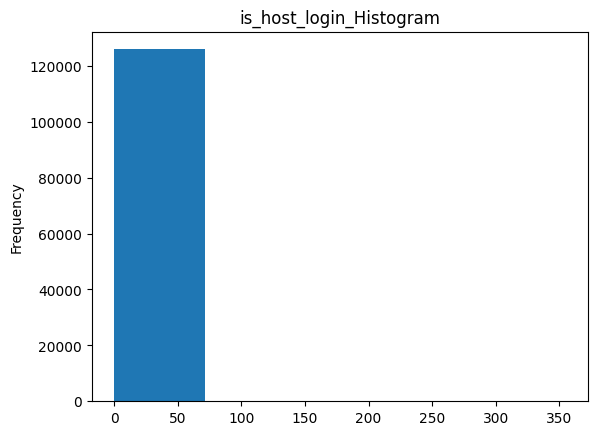

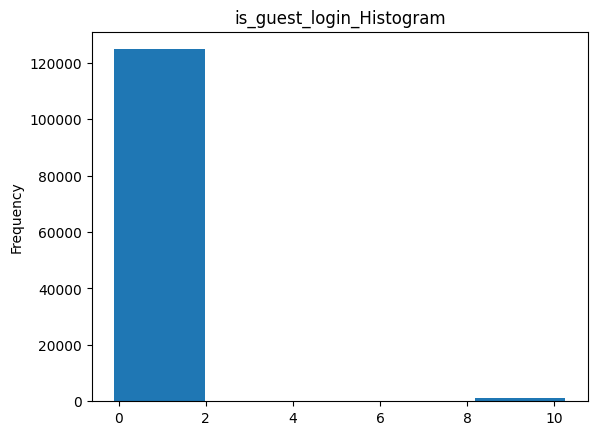

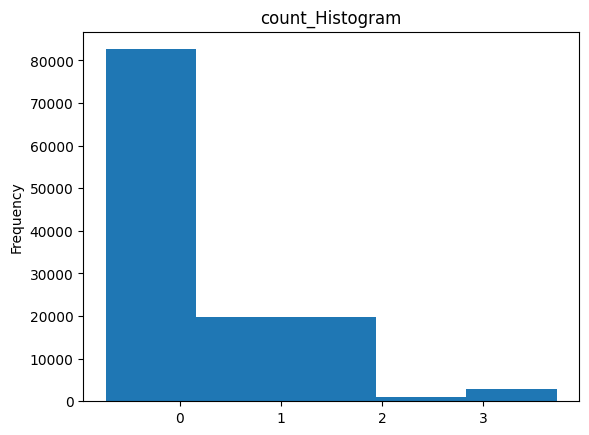

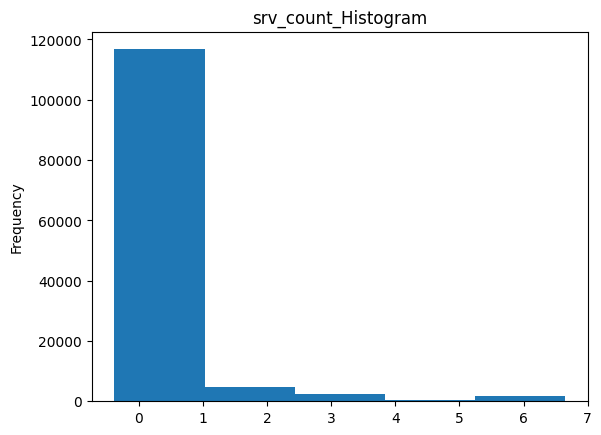

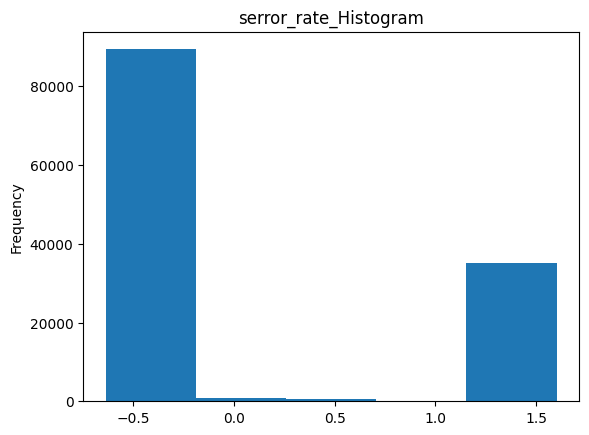

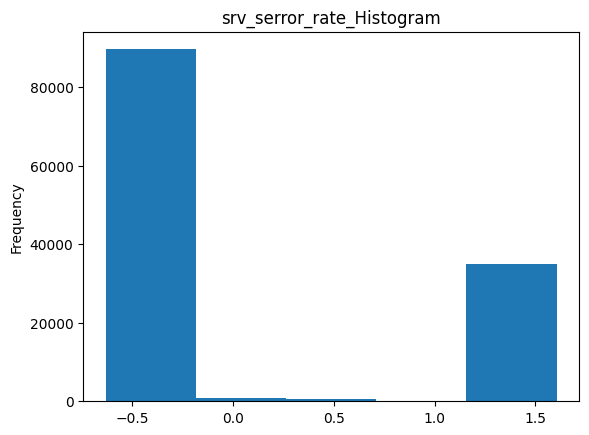

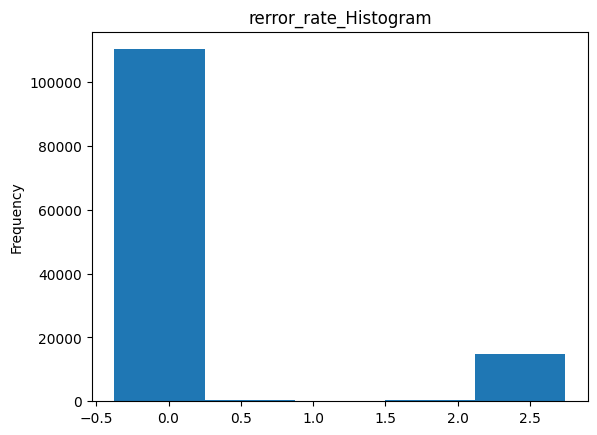

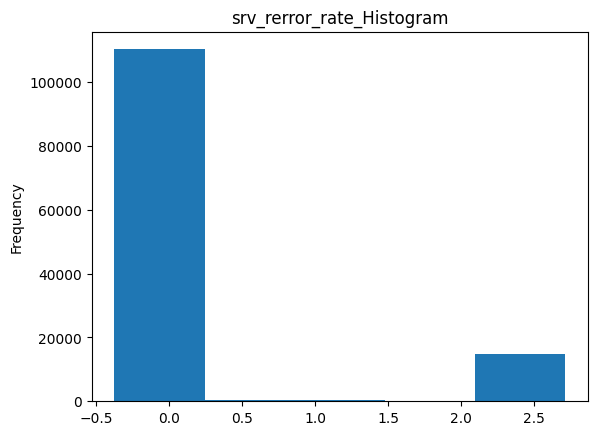

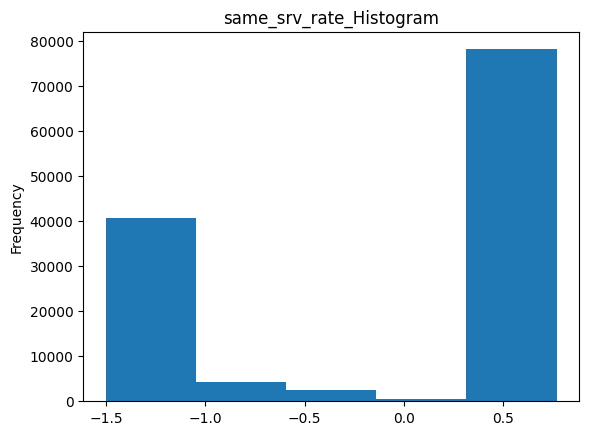

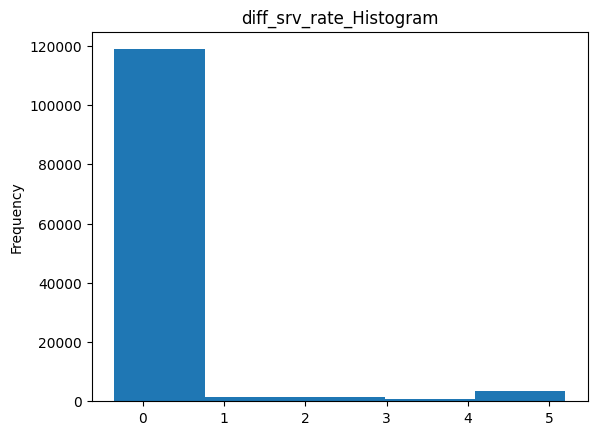

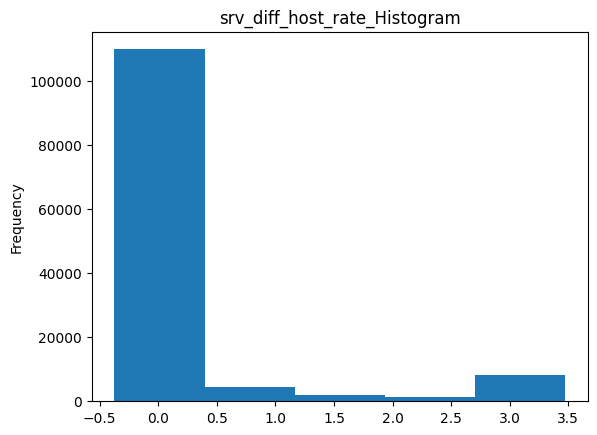

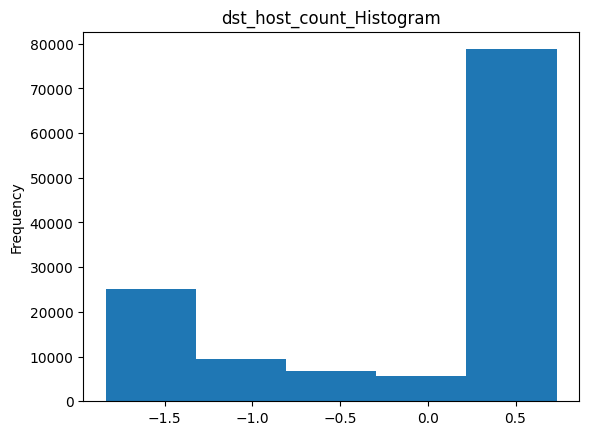

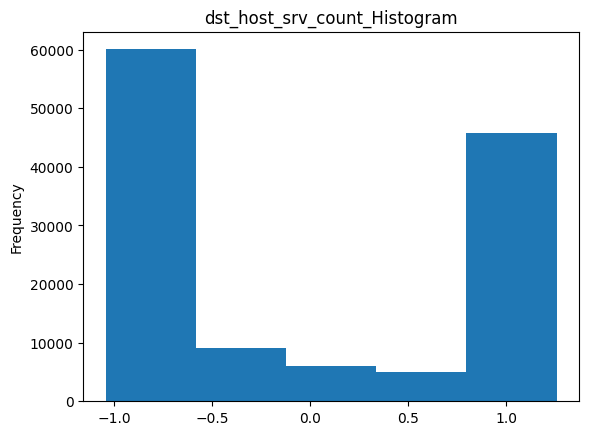

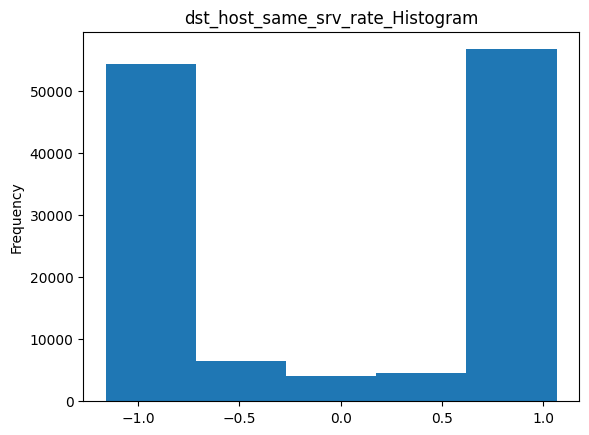

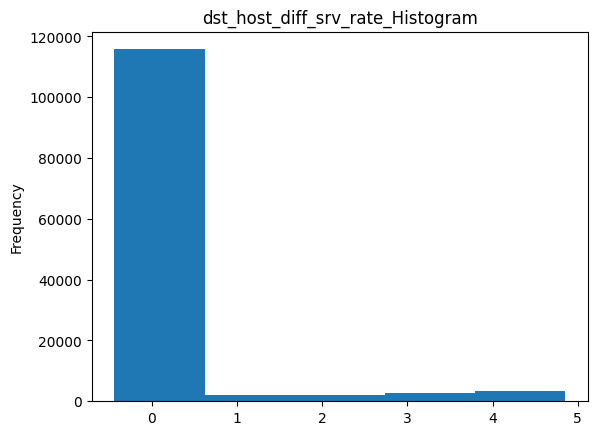

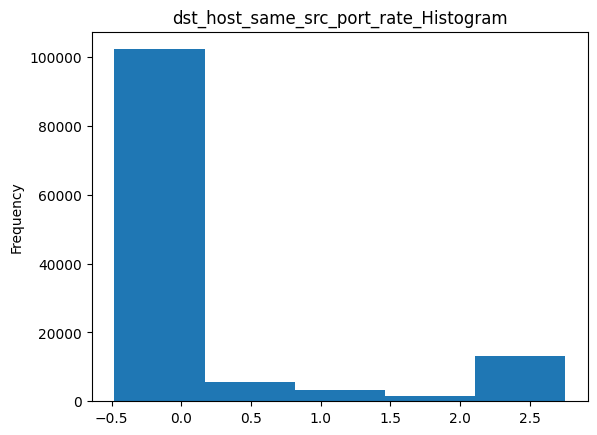

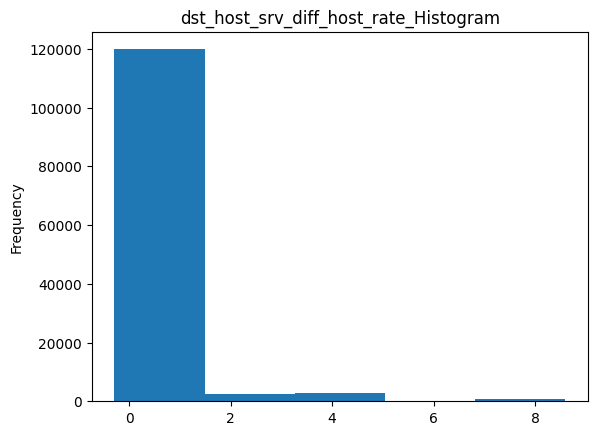

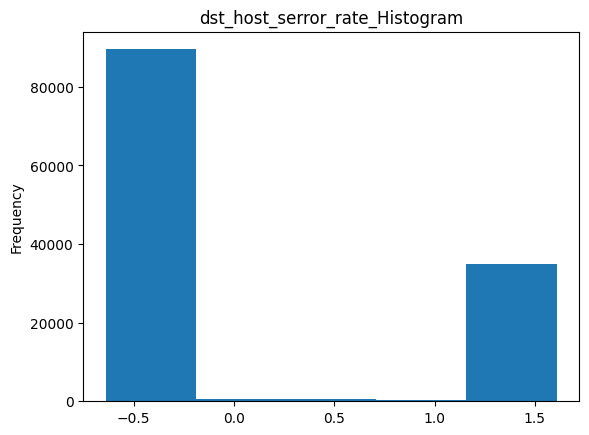

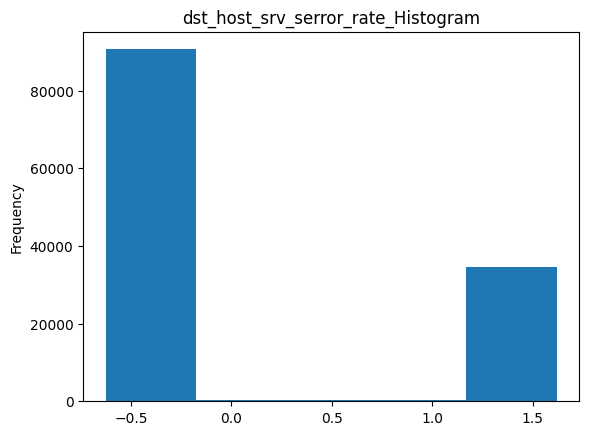

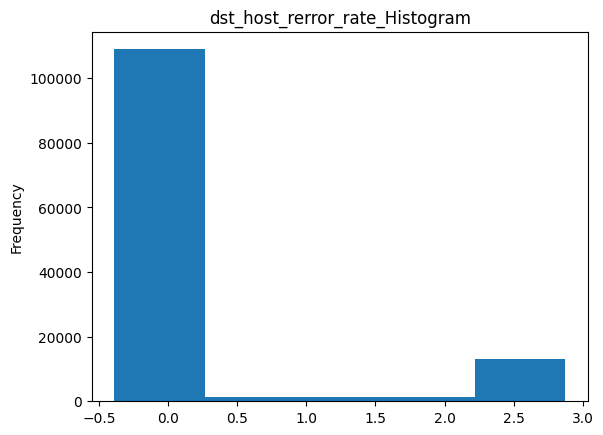

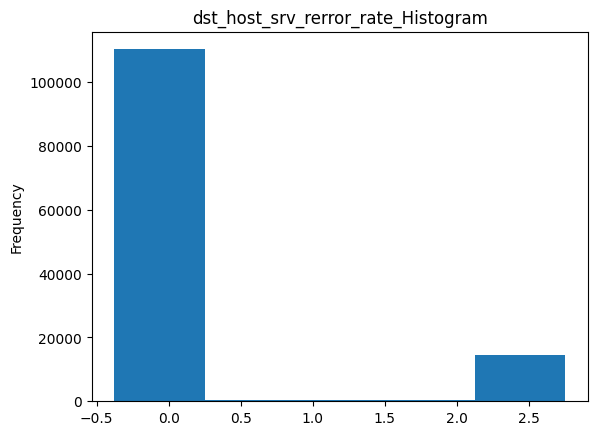

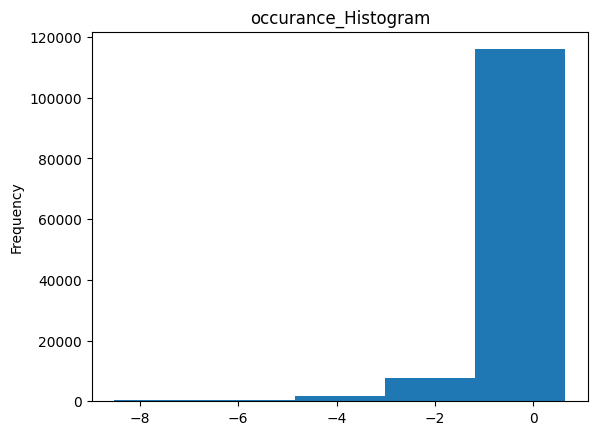

In [116]:
for col in standardized_x.columns:
    if standardized_x[col].dtype != object:
        mp.hist(standardized_x[col], bins=5)
        mp.ylabel('Frequency')
        mp.title(col + "_Histogram")
        mp.show()

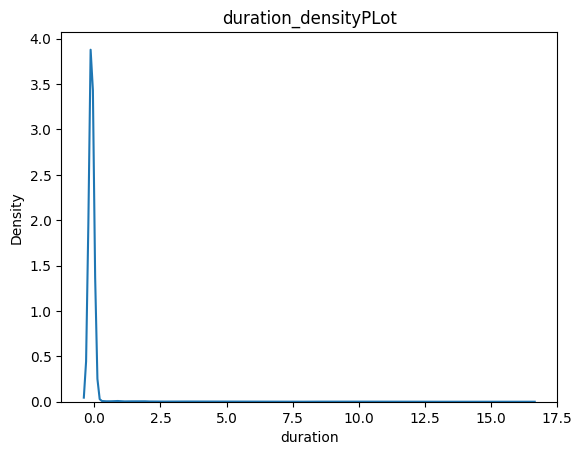

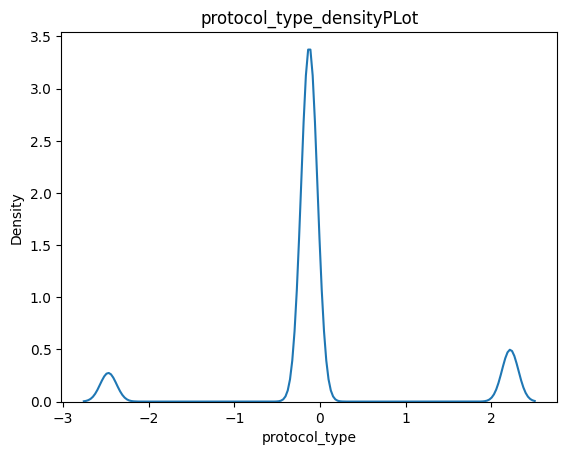

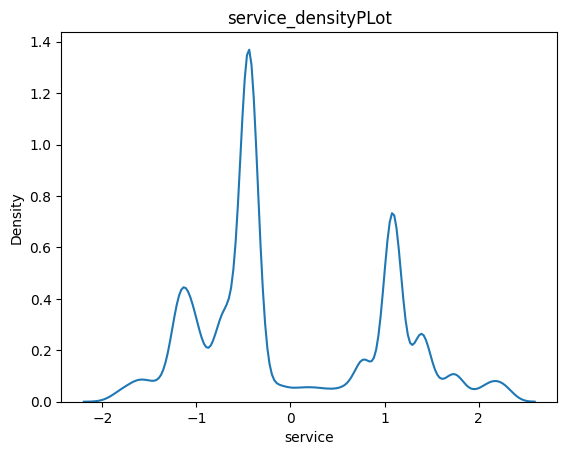

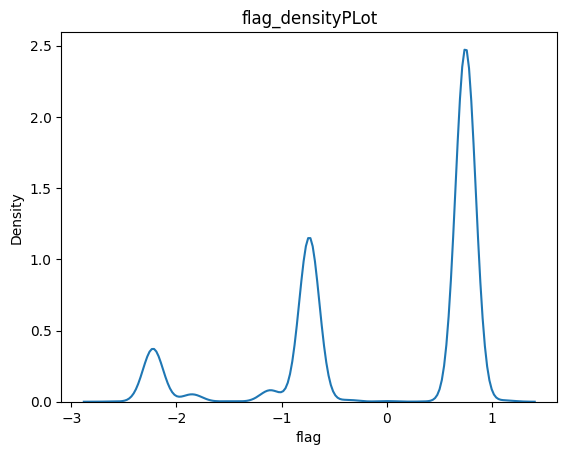

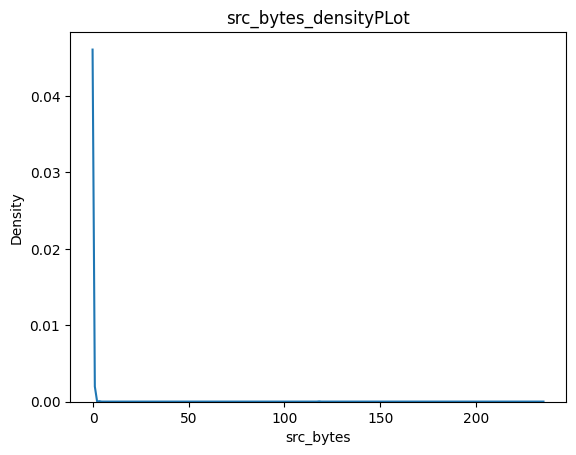

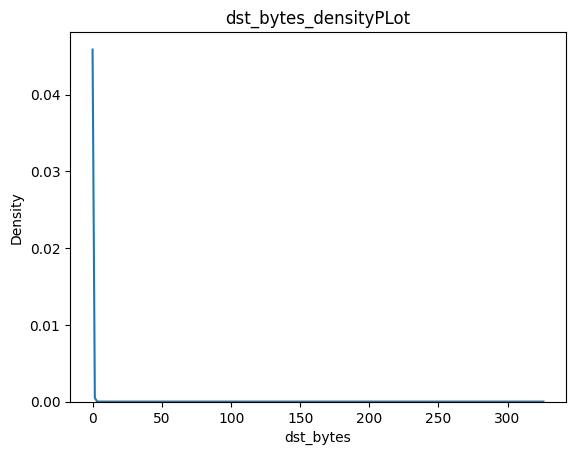

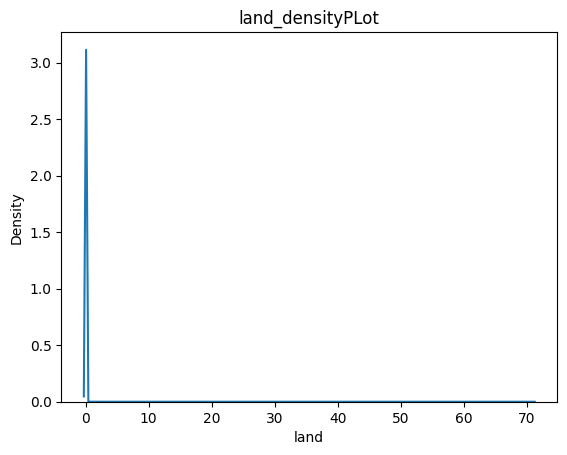

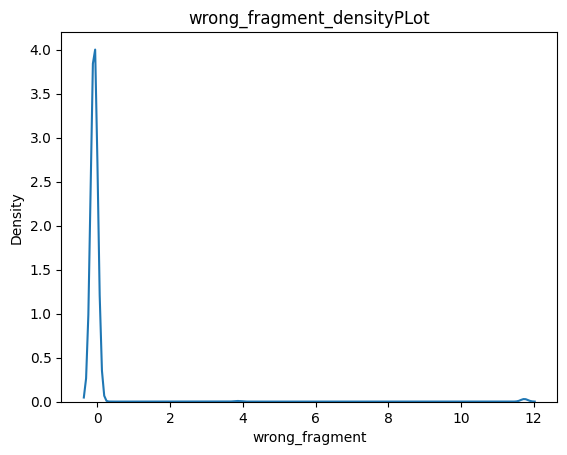

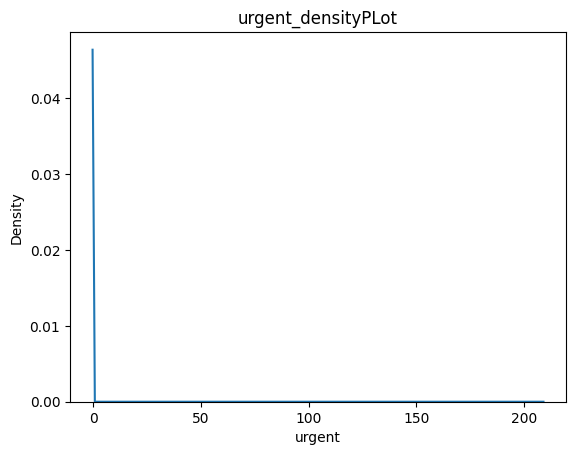

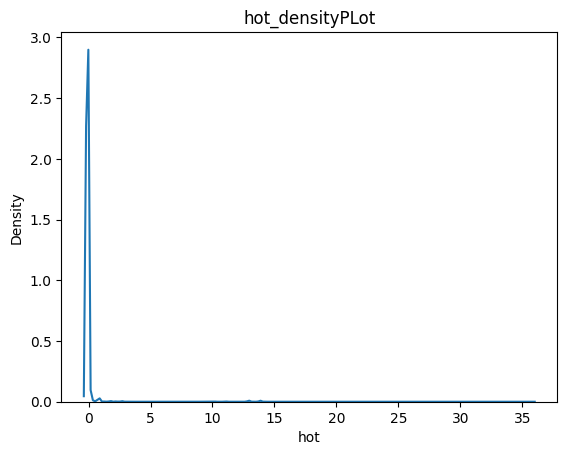

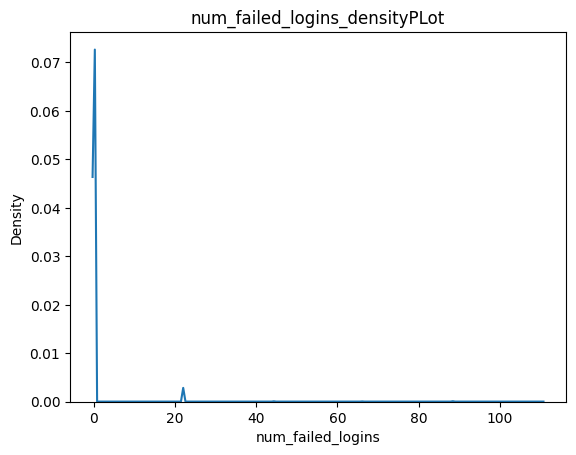

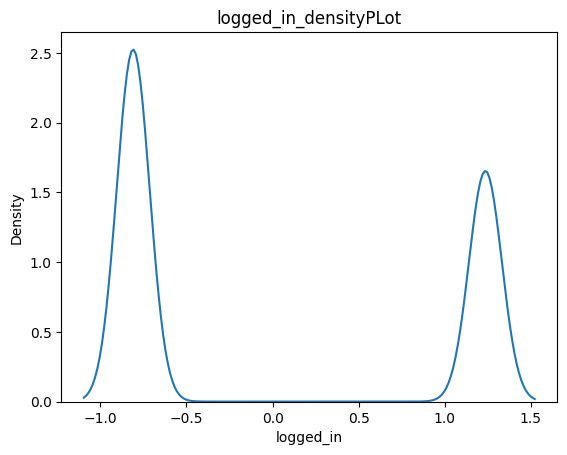

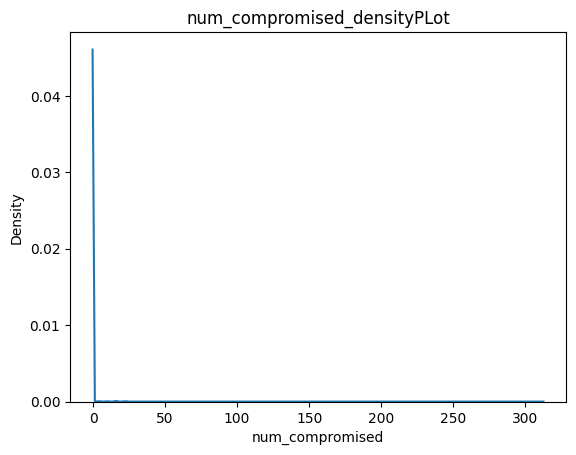

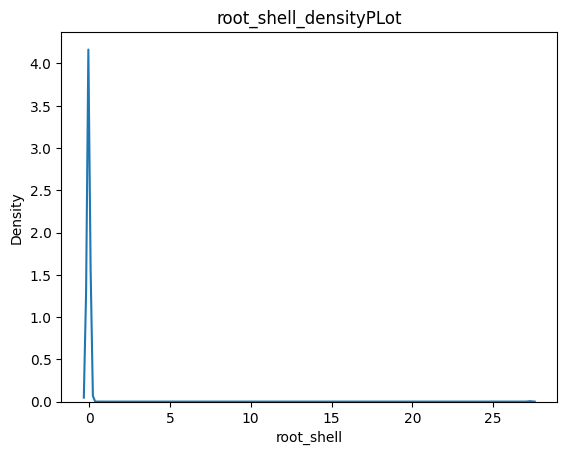

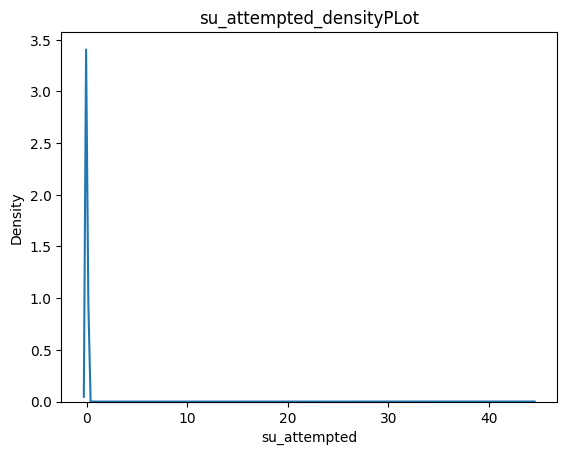

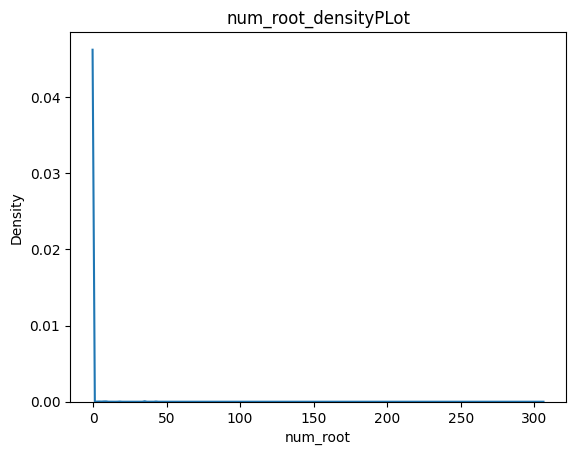

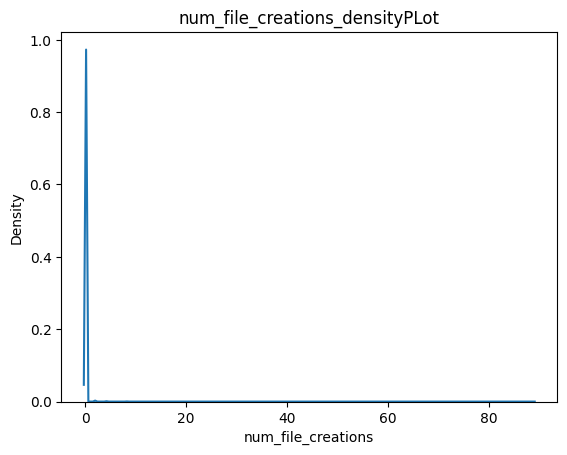

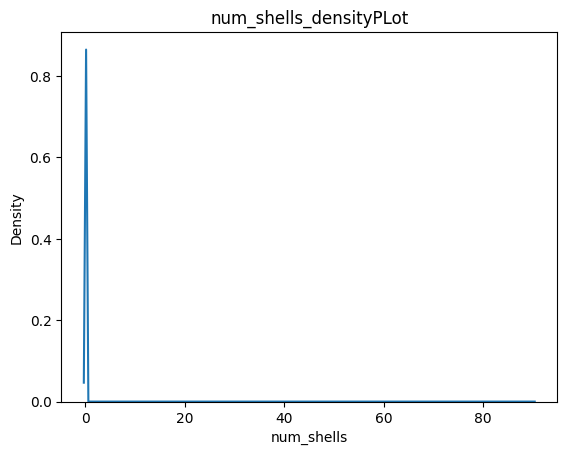

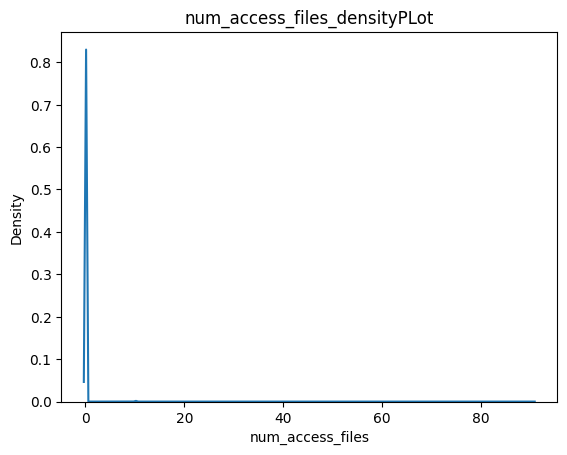

/tmp/ipykernel_4210/1673339364.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(standardized_x[col])


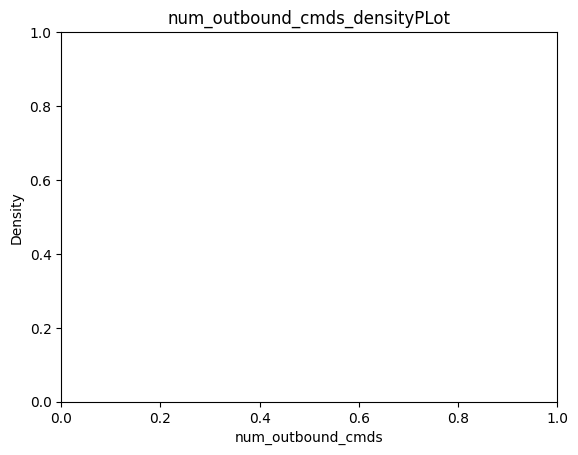

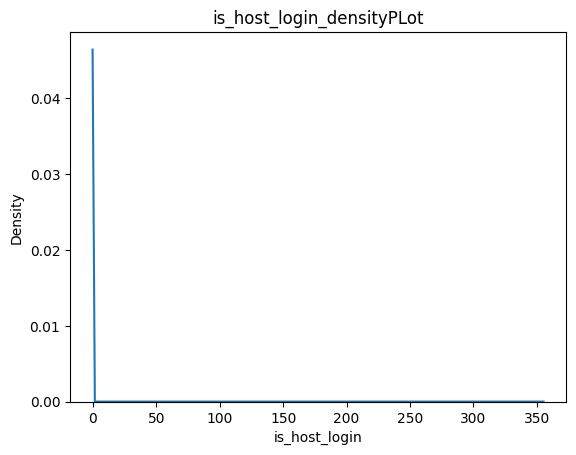

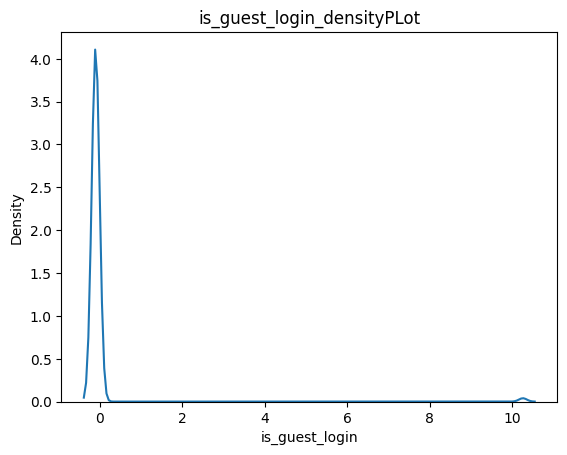

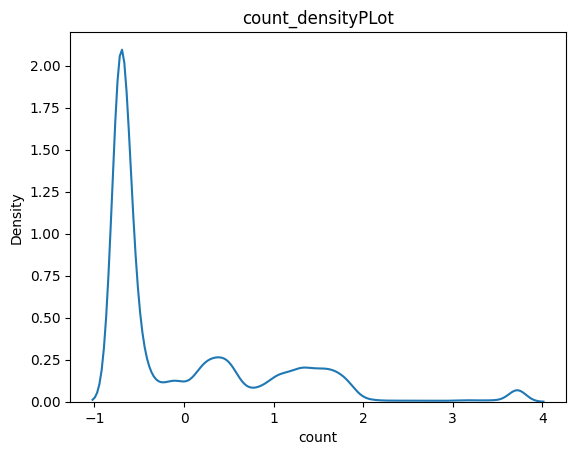

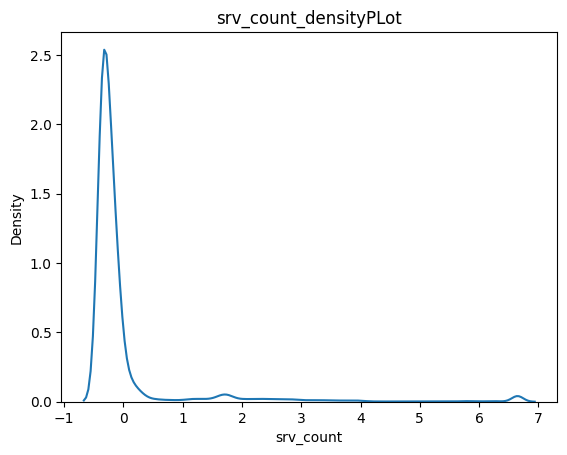

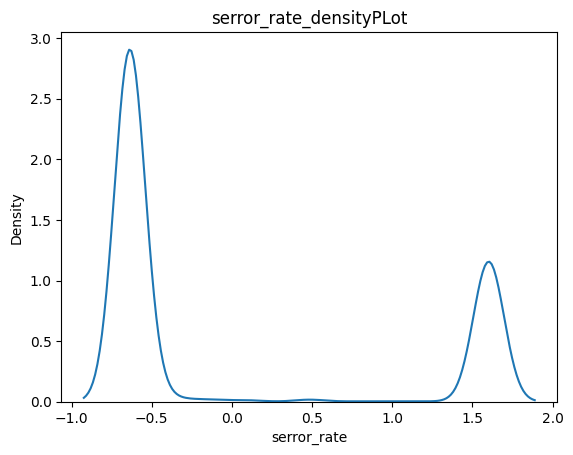

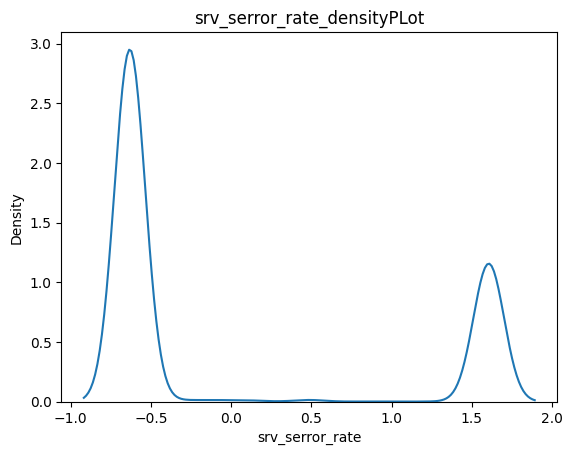

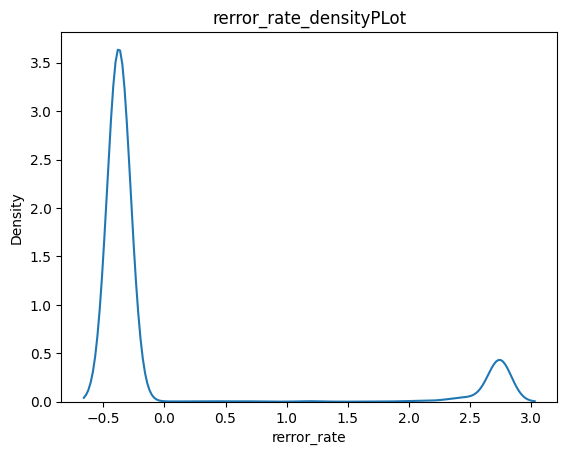

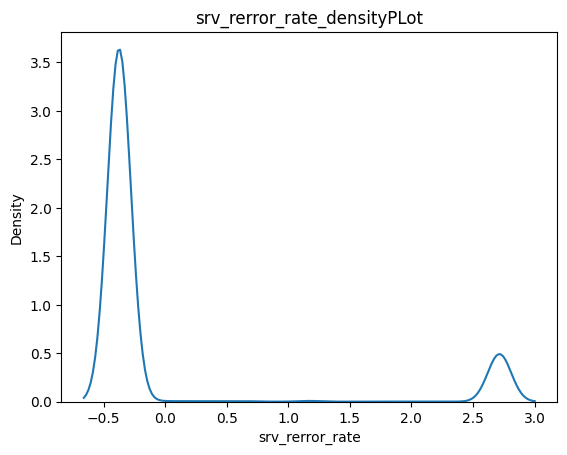

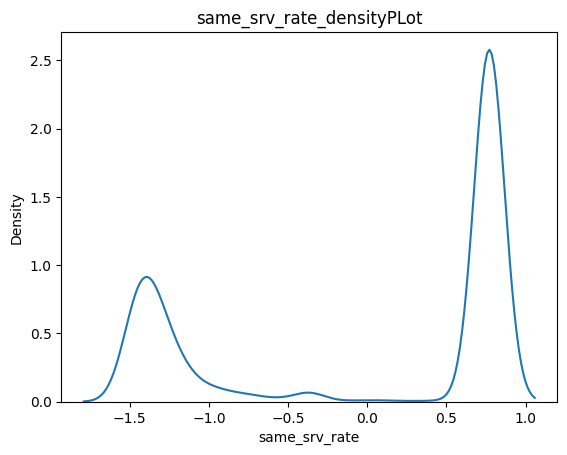

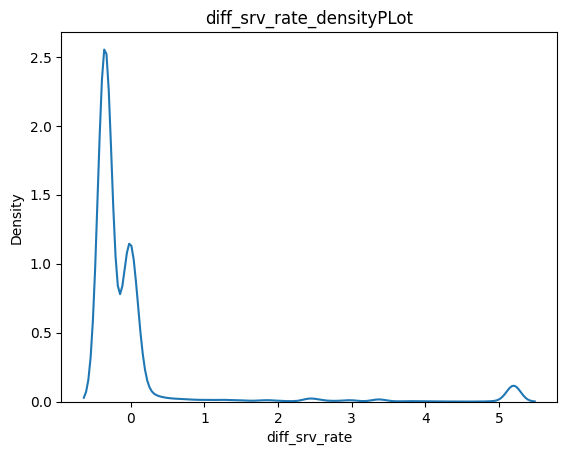

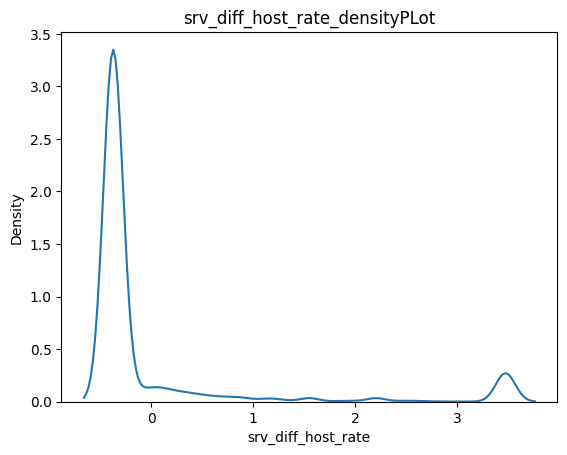

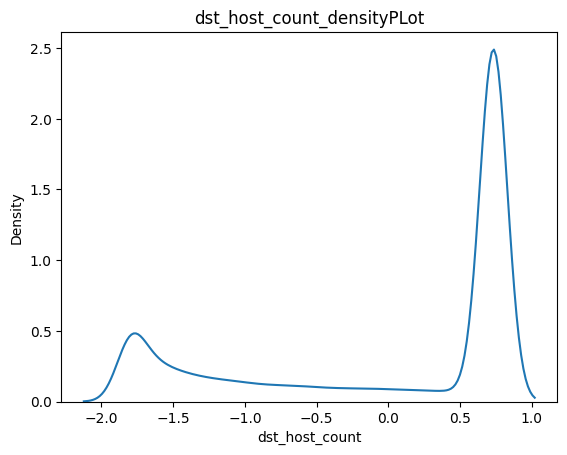

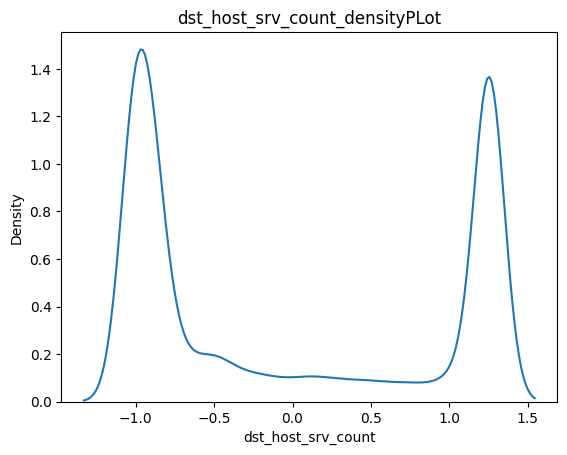

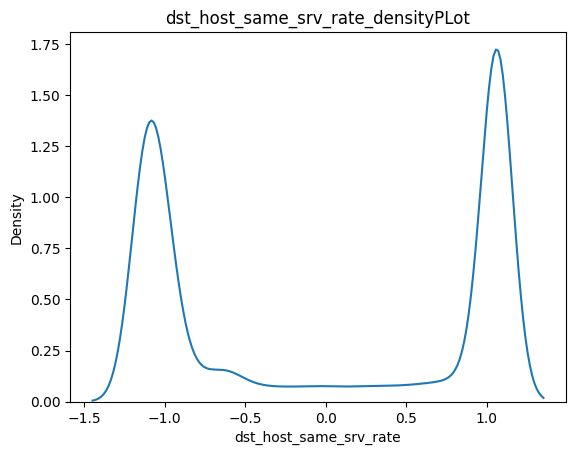

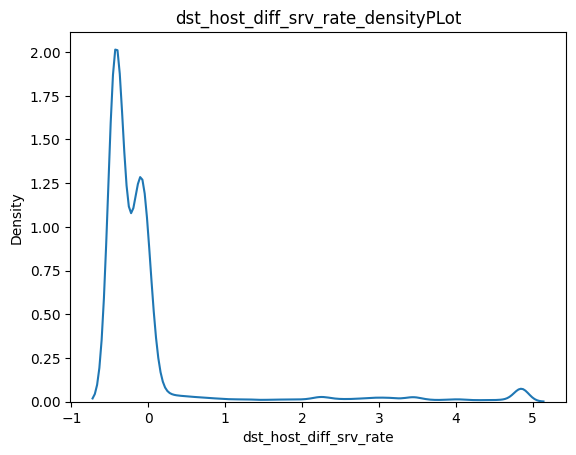

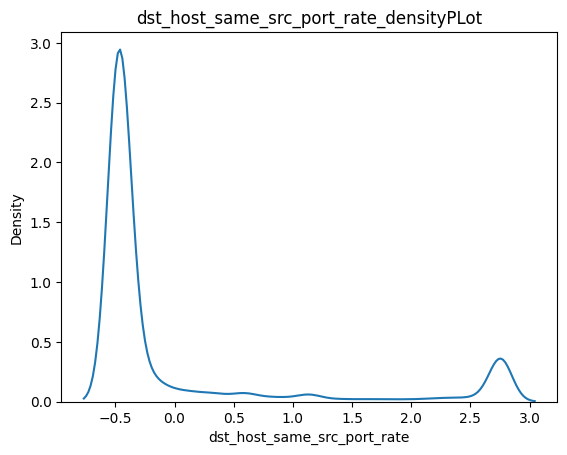

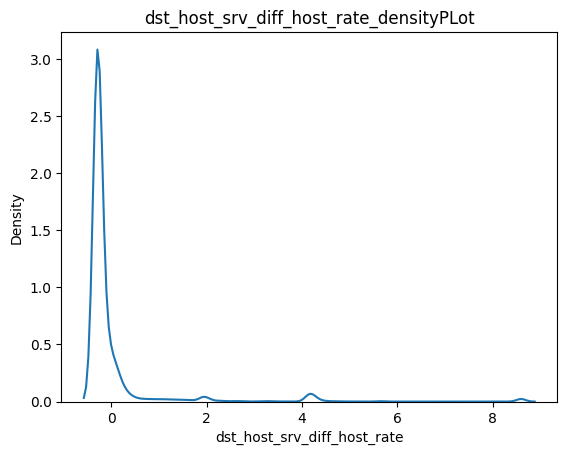

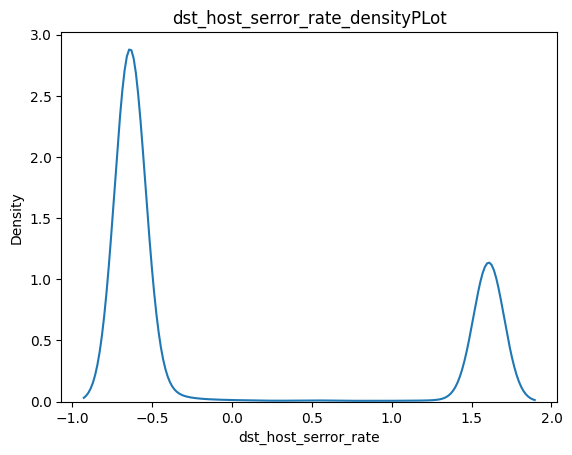

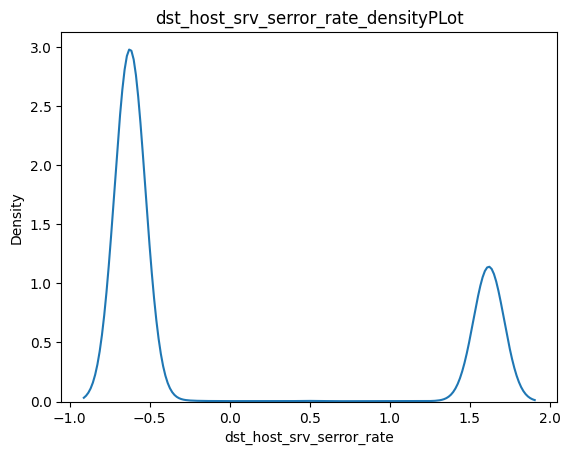

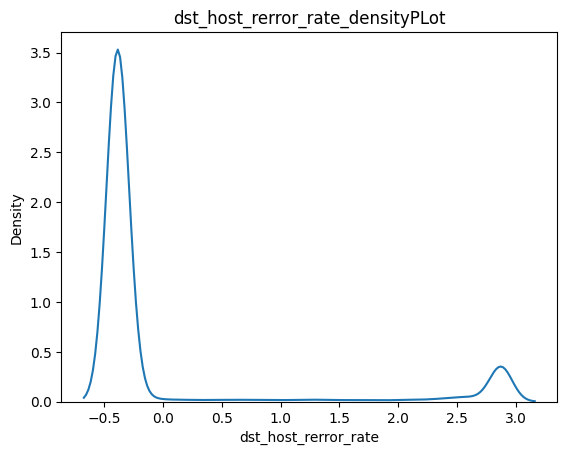

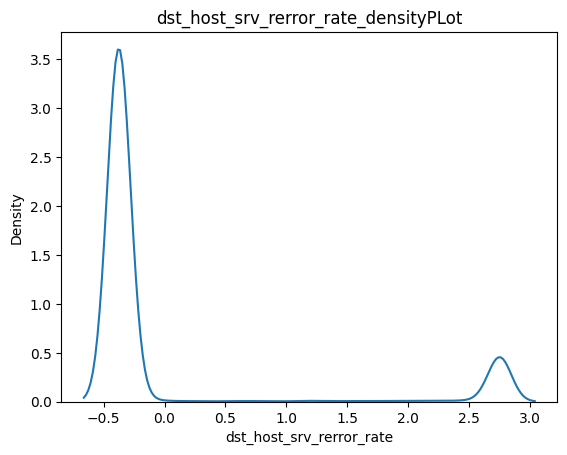

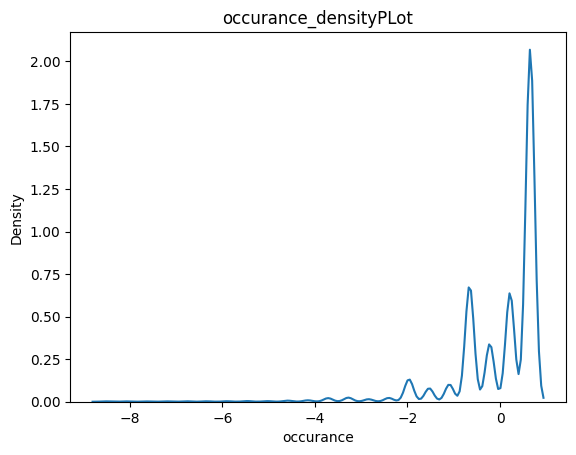

In [117]:
for col in standardized_x.columns:
    if standardized_x[col].dtype != object:
        sns.kdeplot(standardized_x[col])
        mp.ylabel('Density')
        mp.title(col + "_densityPLot")
        mp.show()

In [118]:
#Handling Outliers

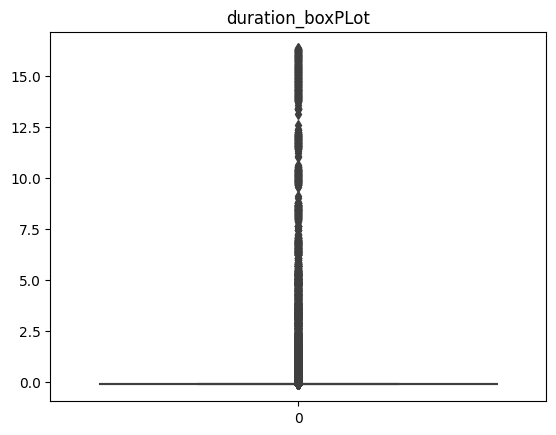

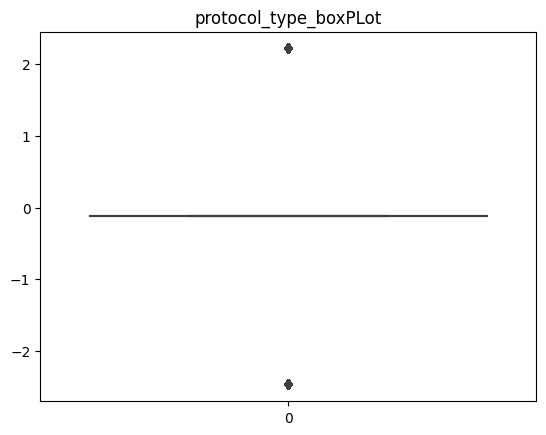

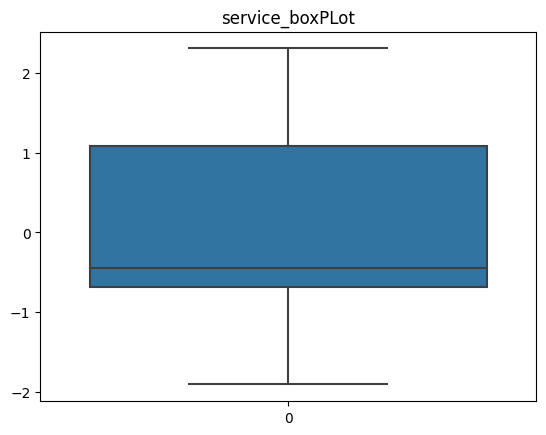

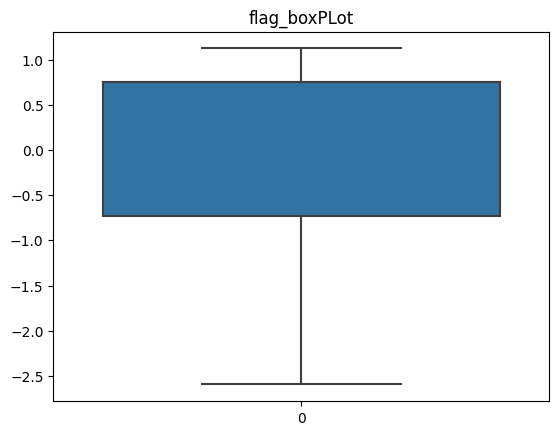

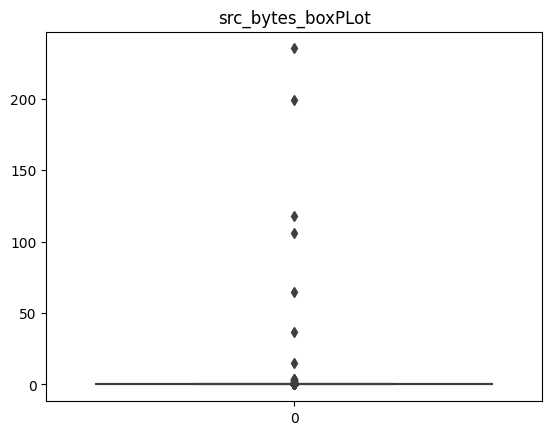

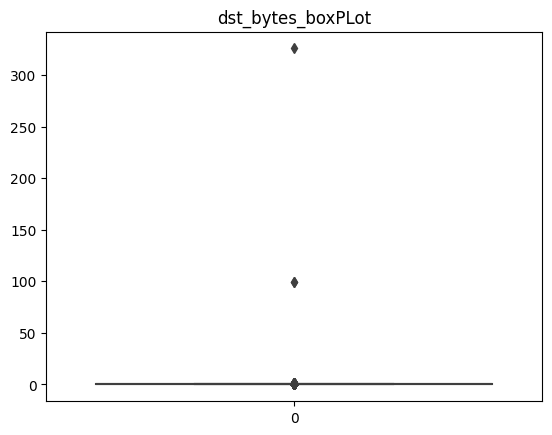

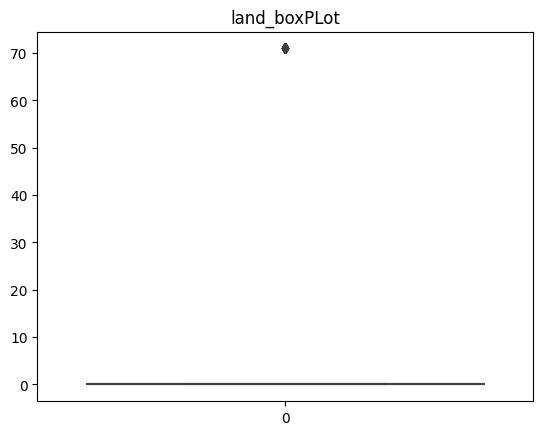

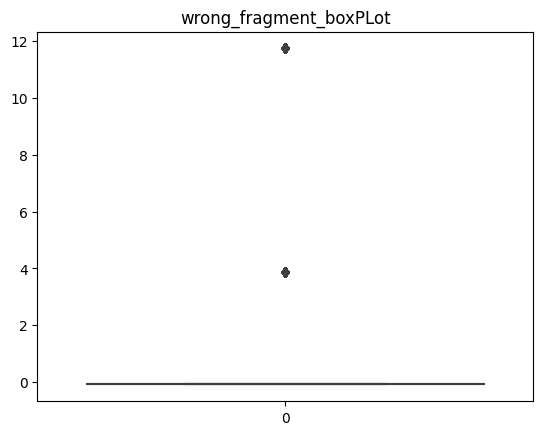

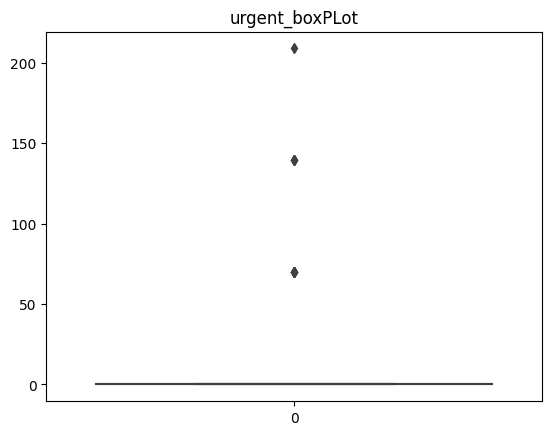

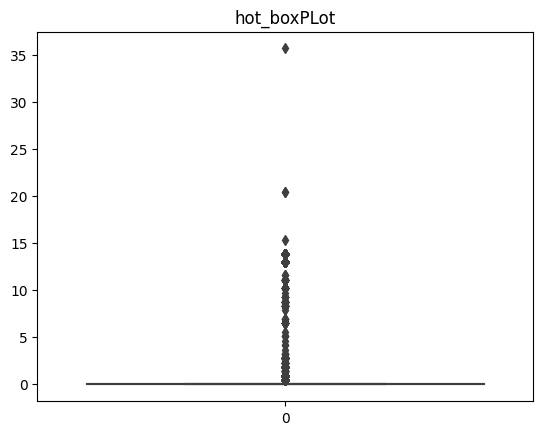

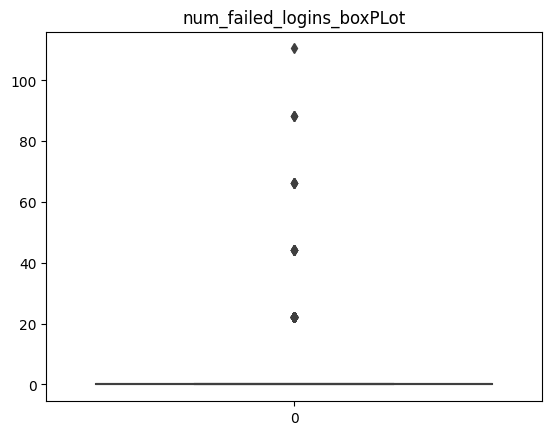

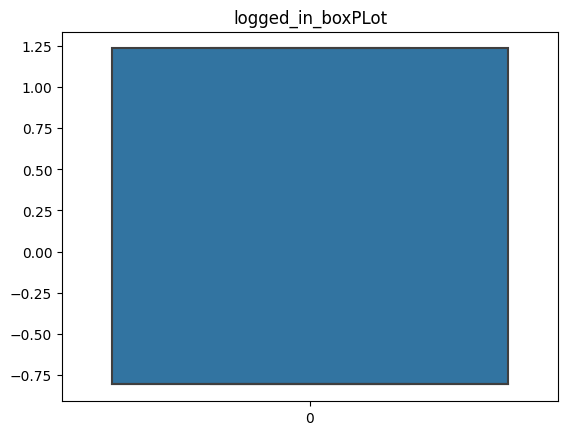

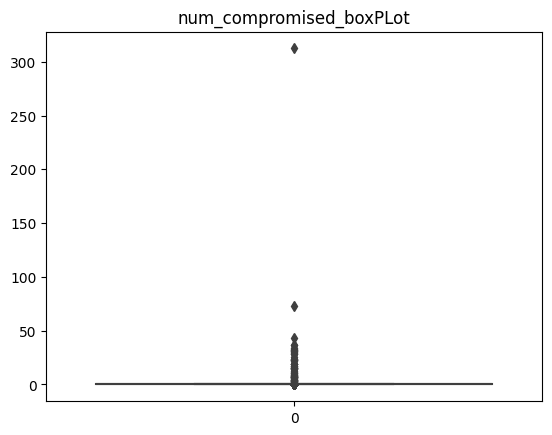

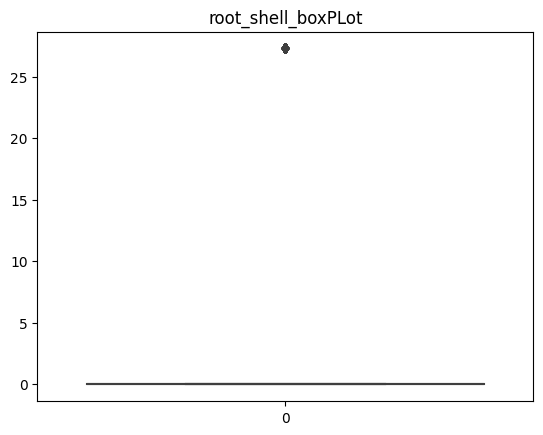

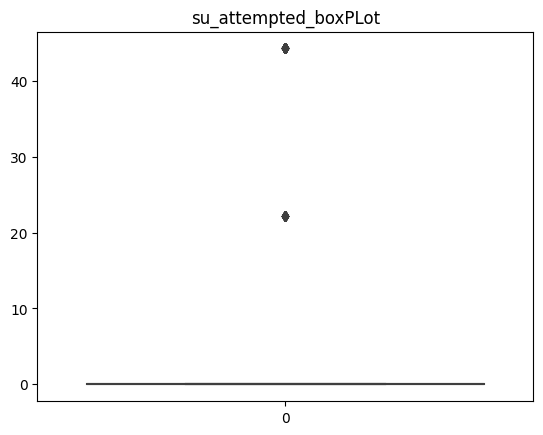

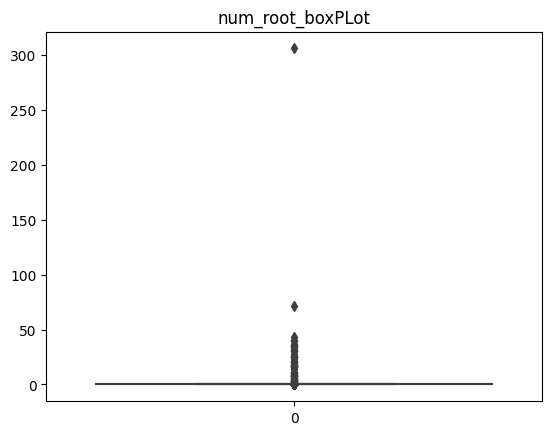

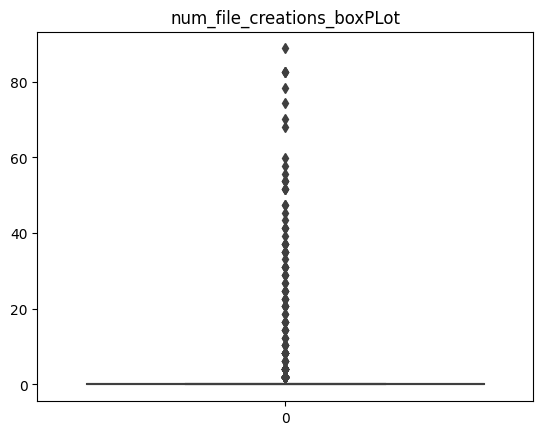

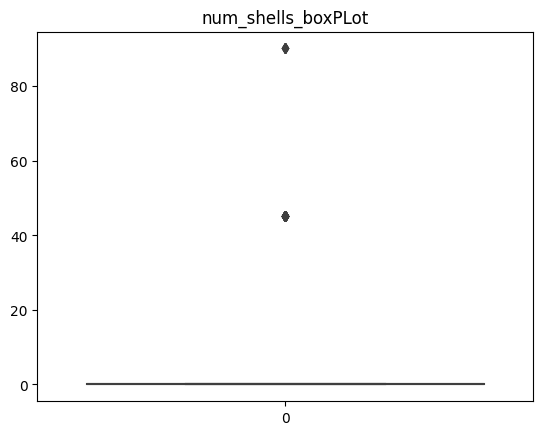

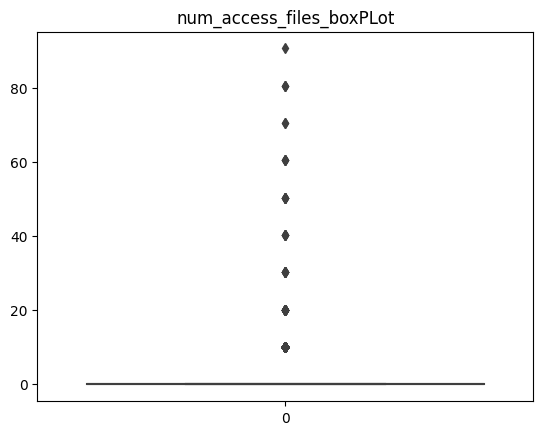

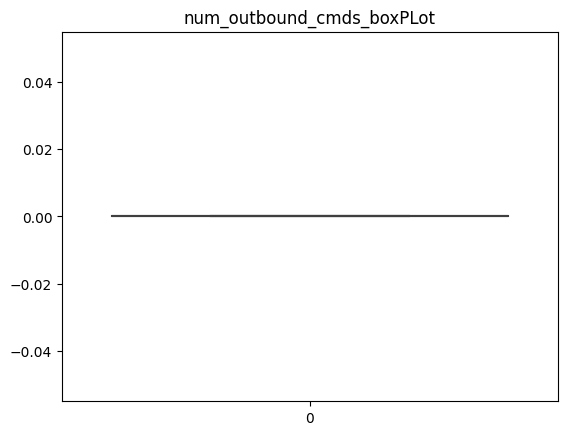

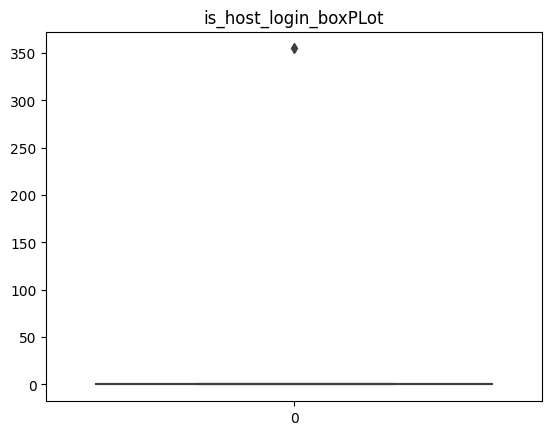

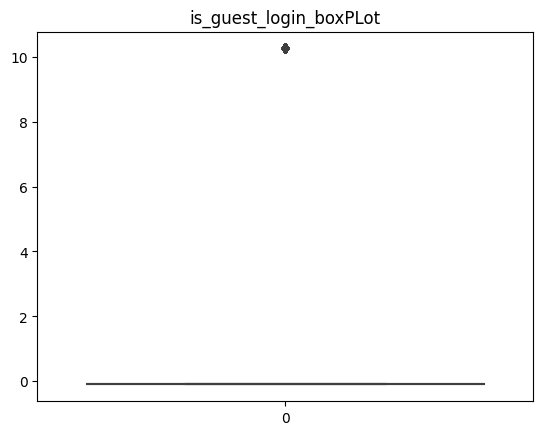

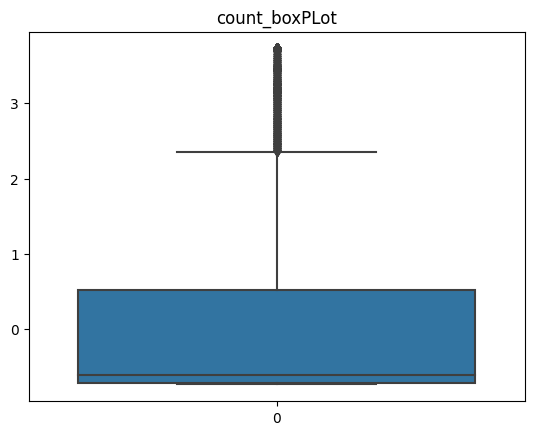

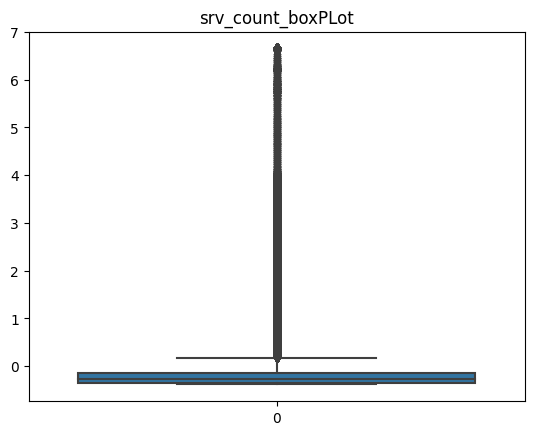

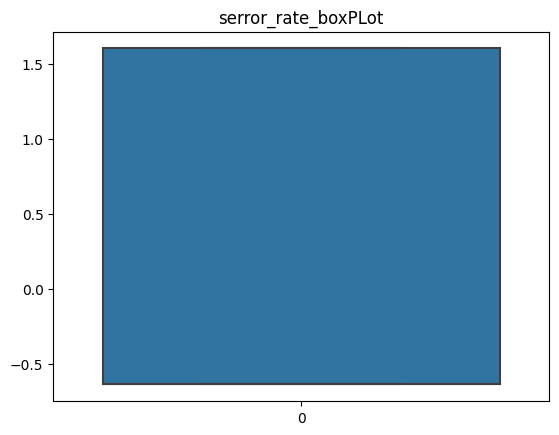

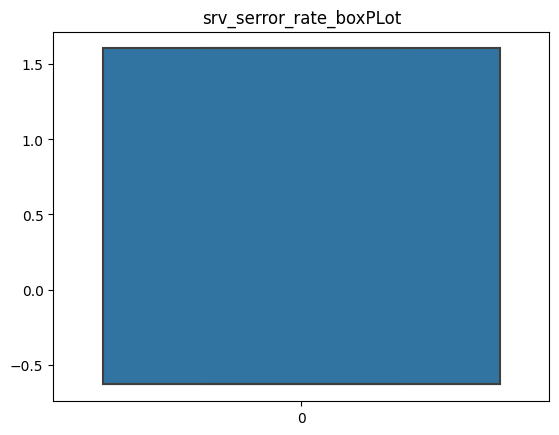

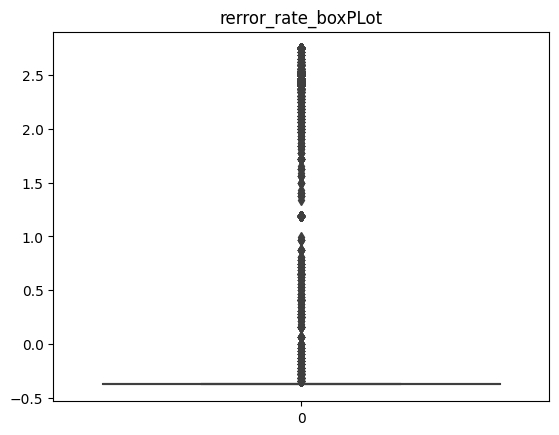

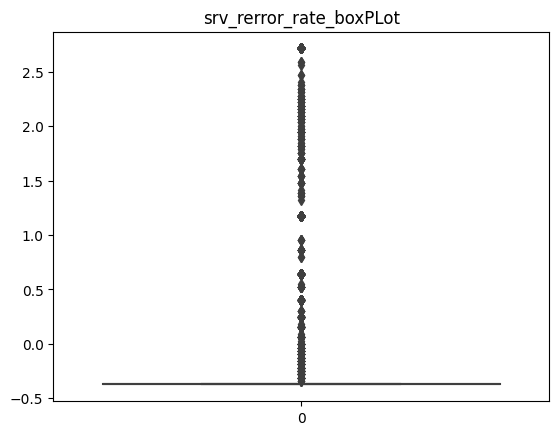

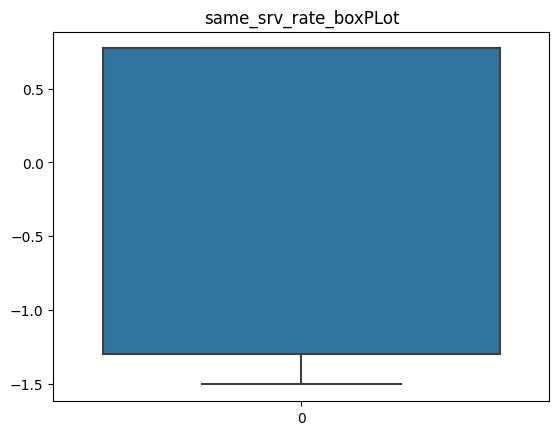

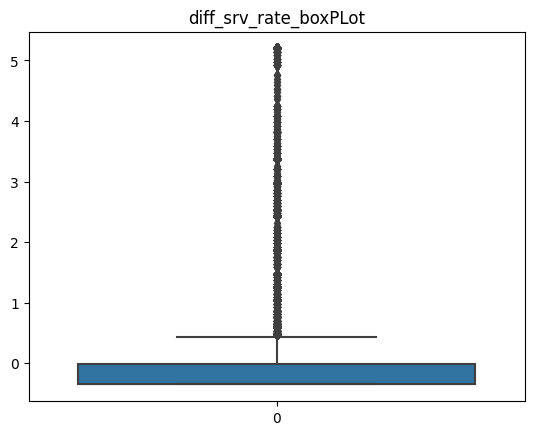

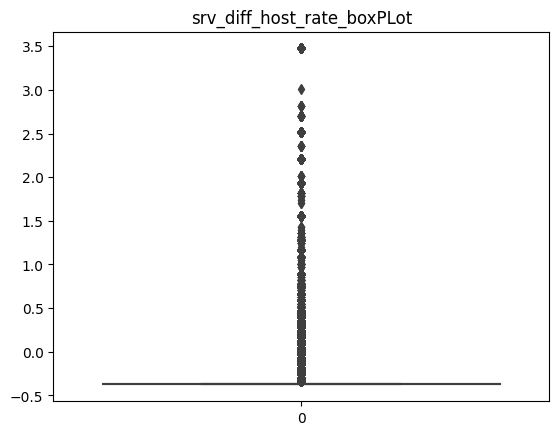

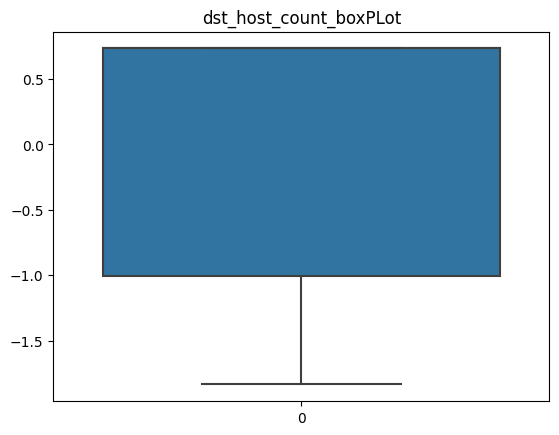

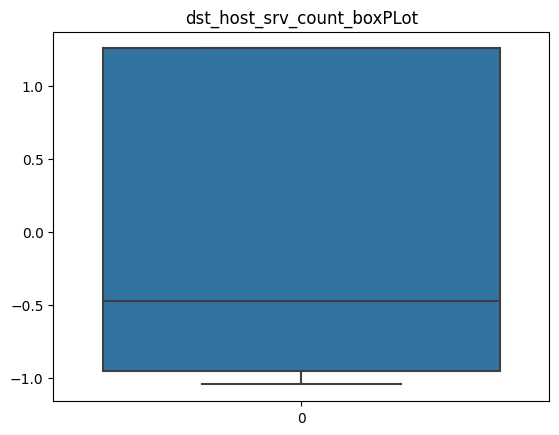

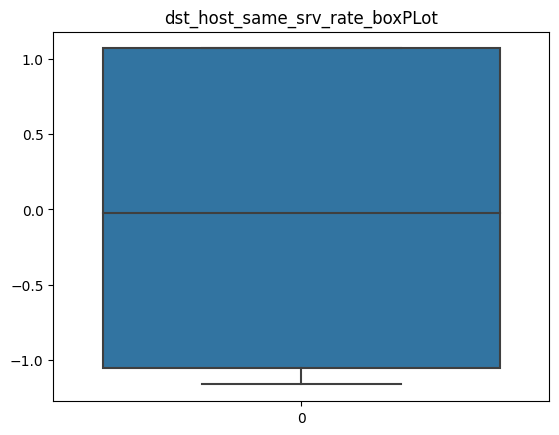

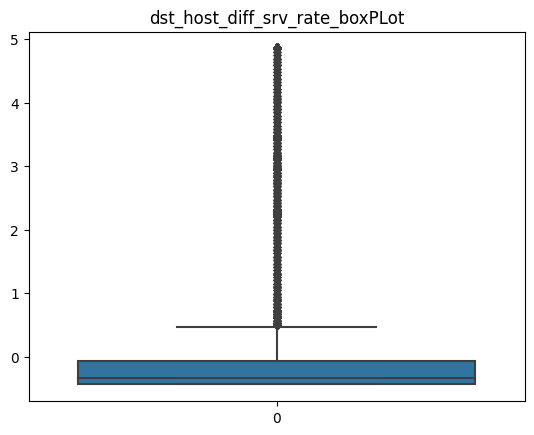

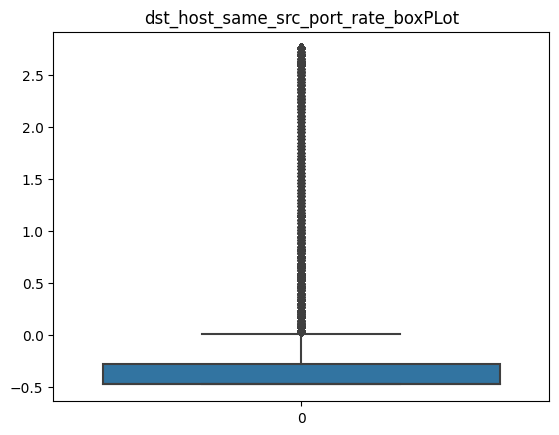

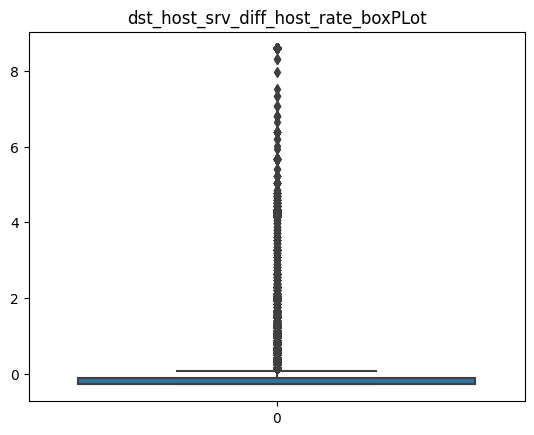

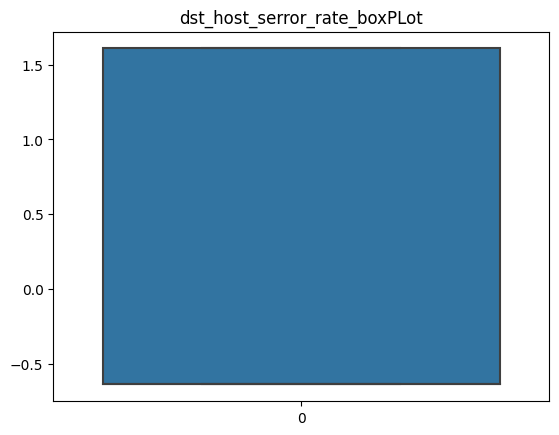

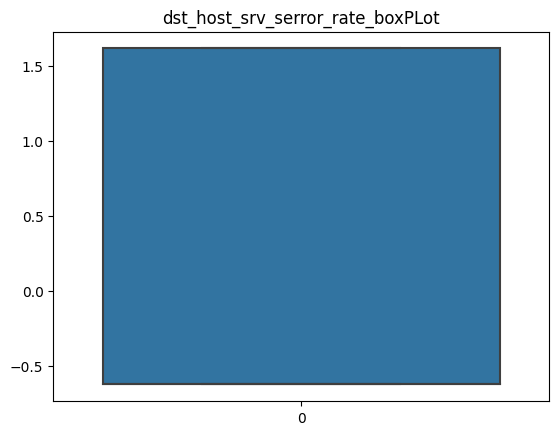

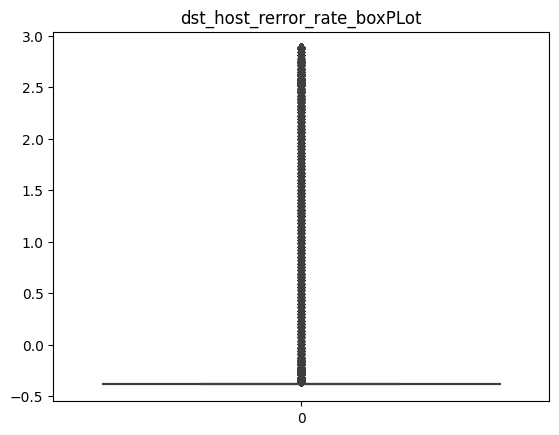

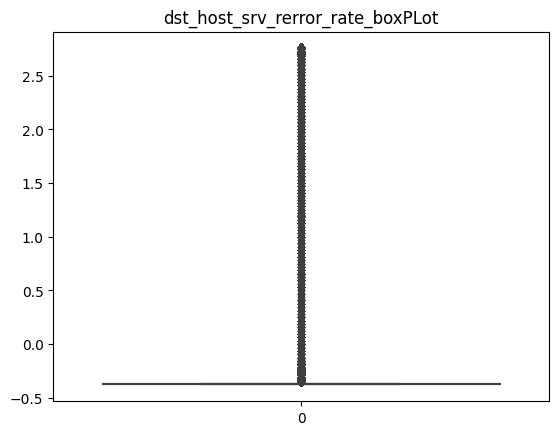

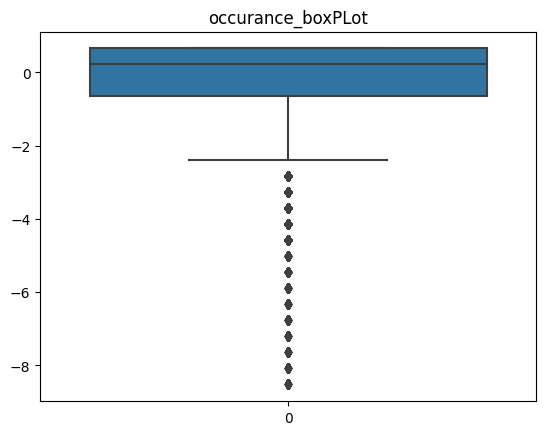

In [119]:

for col in standardized_x.columns:
    if standardized_x[col].dtype != object:
        sns.boxplot(standardized_x[col])
        mp.title(col + "_boxPLot")
        mp.show()

In [32]:
#Outliers were to be handled using IQR approach but as the outliers represent the cyber attacks footprints during the network trafficking
#we'll keep them in our dataset

In [33]:
#Bivariate Analysis

In [34]:

X_train, X_test, y_train, y_test =train_test_split(standardized_x,y,test_size=0.3,random_state =0)
X_train.shape, X_test.shape

((88174, 42), (37790, 42))

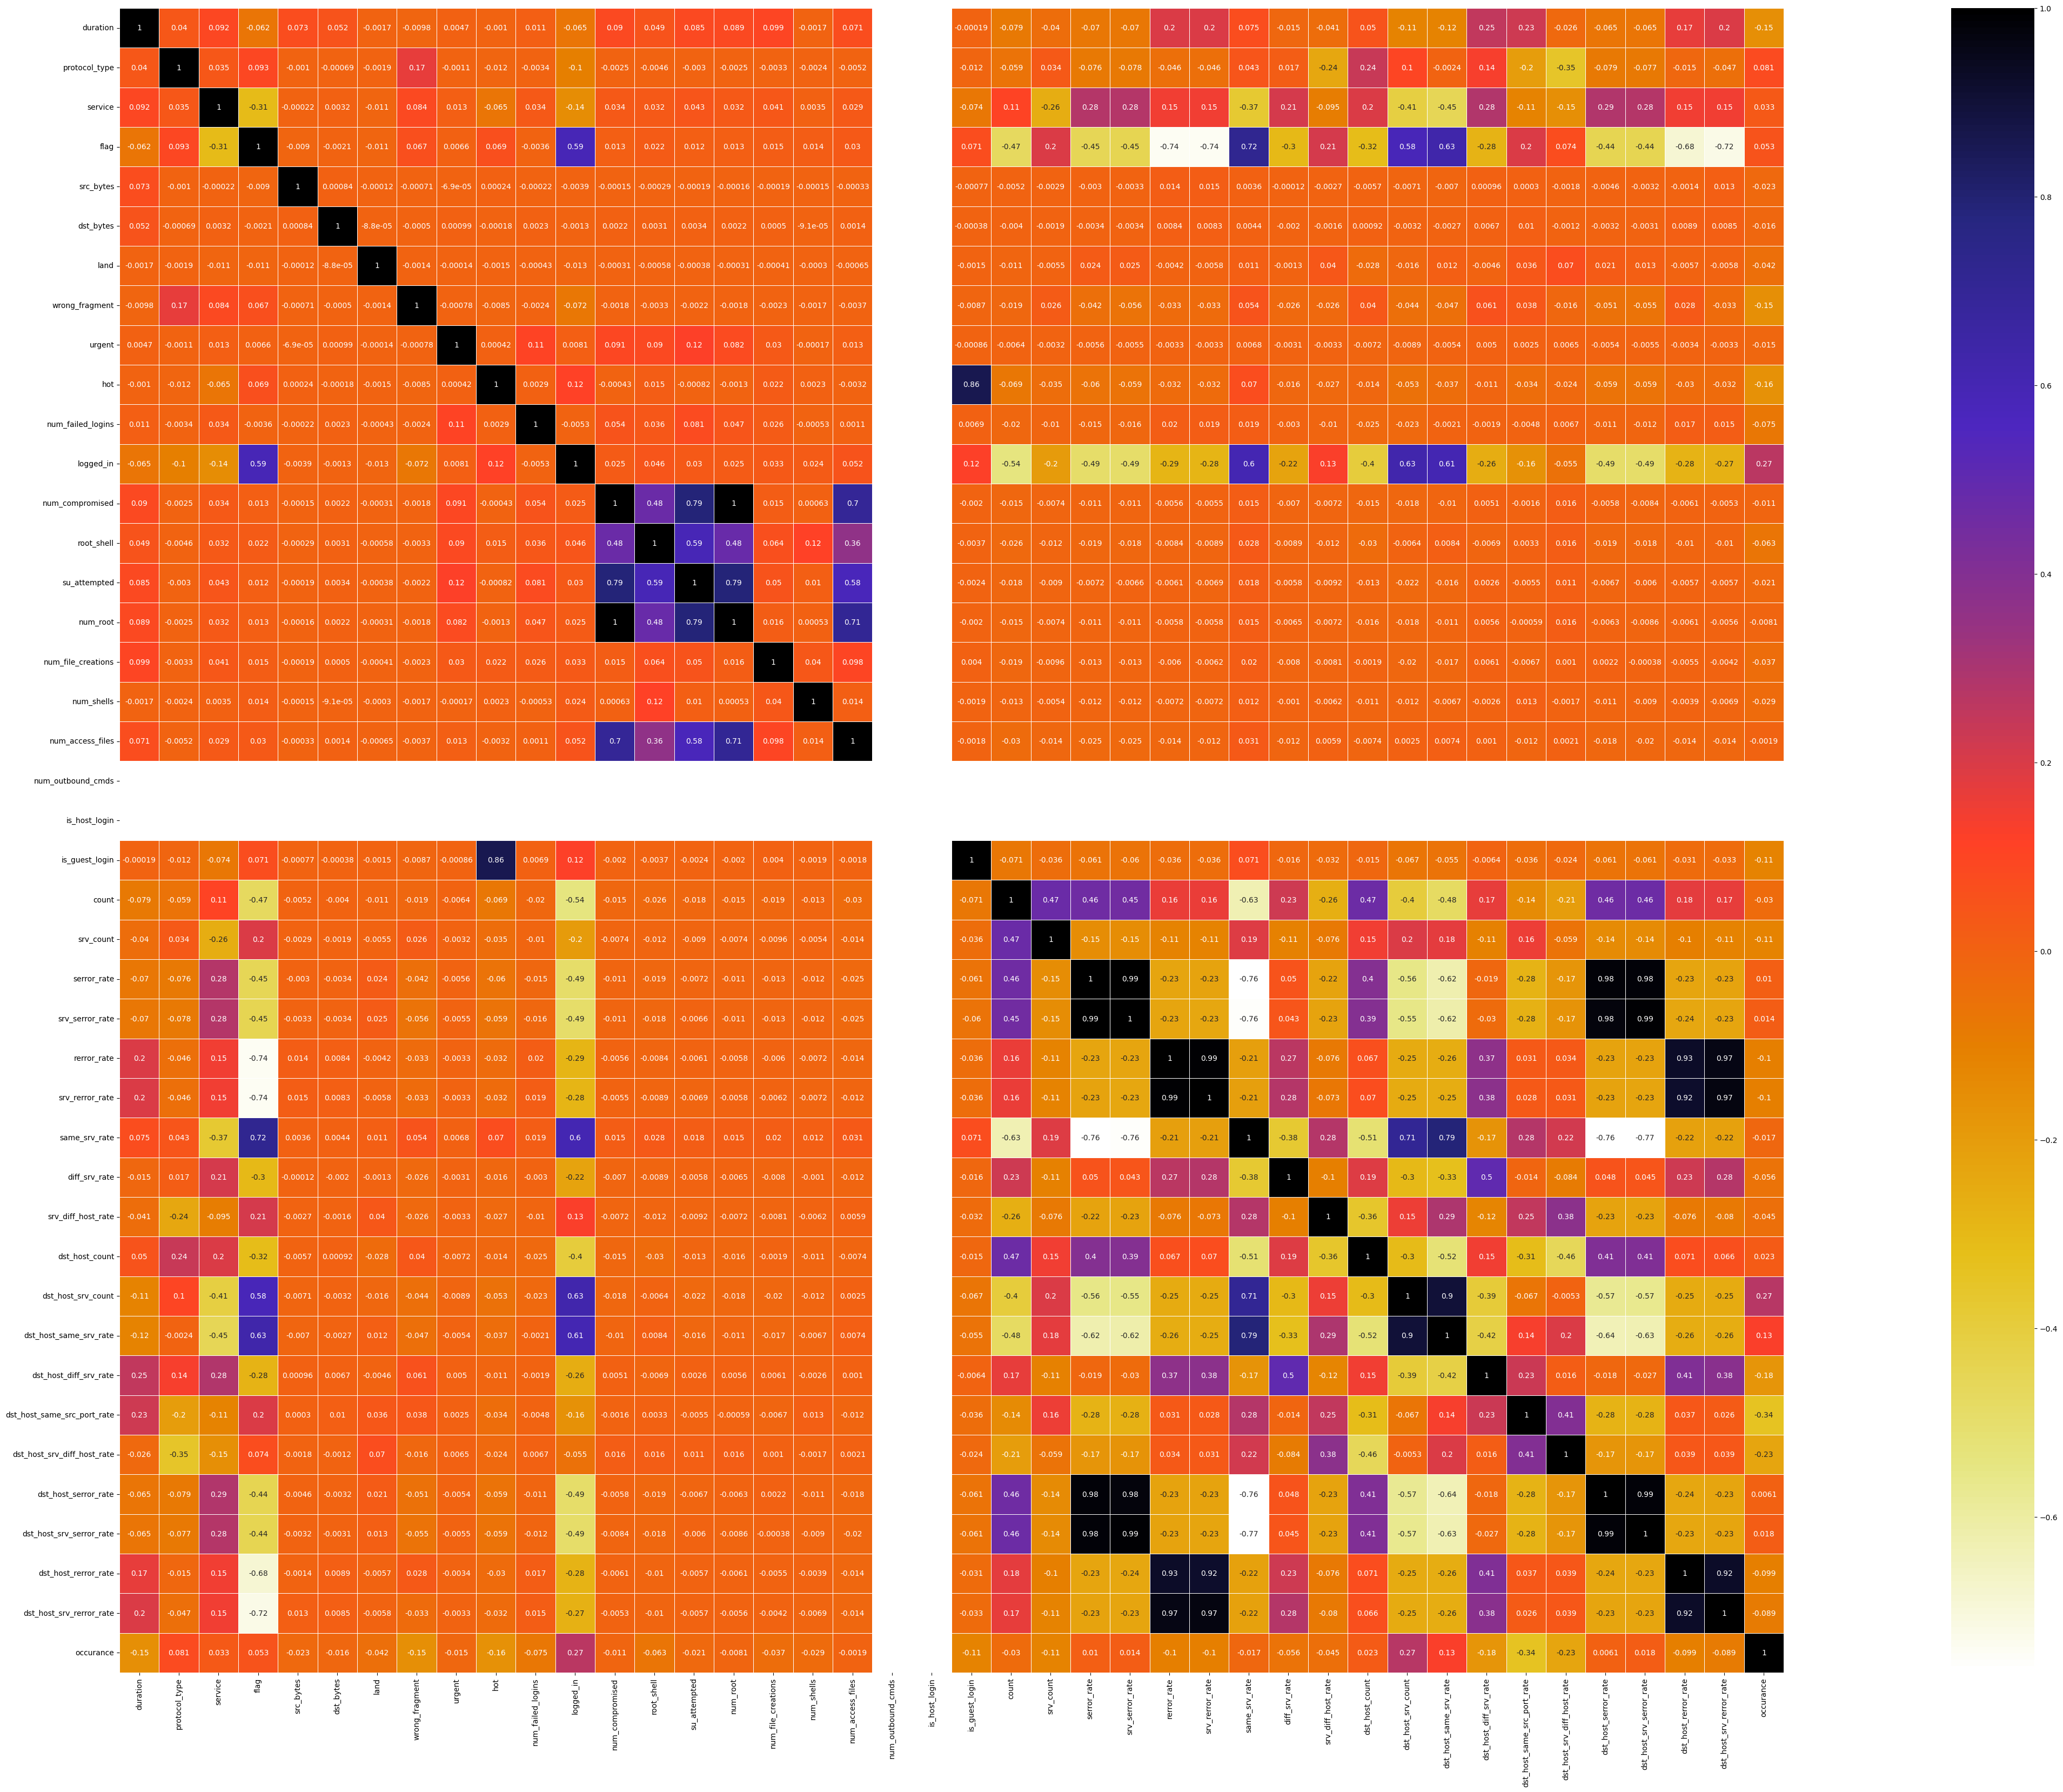

In [35]:
#Correlation Analysis

mp.figure(figsize=(80,40))
corr = X_train.corr()
sns.heatmap(corr, annot= True,cmap = mp.cm.CMRmap_r,square=True, linewidth =.5)
mp.show()

In [36]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

    

In [37]:
corr_features = correlation(X_train, 0.85)
len(set(corr_features))

9

In [38]:
corr_features

{'dst_host_rerror_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'is_guest_login',
 'num_root',
 'srv_rerror_rate',
 'srv_serror_rate'}

In [39]:
Xtrnew = X_train.drop(corr_features,axis=1)
Xtestnew = X_test.drop(corr_features,axis=1)

In [40]:
Xtrnew.shape

(88174, 33)

In [41]:
Xtestnew.shape

(37790, 33)

# KNN

In [130]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn3 = KNeighborsClassifier(n_neighbors=3)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn3.fit(Xtrnew, y_train)
y_pred_3 = knn3.predict(Xtestnew)
knn5.fit(Xtrnew, y_train)
y_pred_5 = knn5.predict(Xtestnew)

print("Accuracy with k=3", accuracy_score(y_test, y_pred_3)*100)
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)


Accuracy with k=3 99.8227044191585
Accuracy with k=5 99.79624239216724


In [131]:
# now if we don't remove those features
knnact = KNeighborsClassifier(n_neighbors=3)
knnact.fit(X_train, y_train)
y_predict_act = knnact.predict(X_test)
print("Accuracy with k=3", accuracy_score(y_test, y_predict_act)*100)

Accuracy with k=3 99.86239745964541


# Decision Tree


In [132]:
from sklearn.tree import DecisionTreeClassifier
DTC_Model =DecisionTreeClassifier(criterion= 'entropy', max_depth=4, random_state=10)
DTC_Model.fit(Xtrnew, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10)

In [133]:
DTC_Model.score(Xtrnew , y_train)

0.9689477623789325

In [134]:
DTC_Model =DecisionTreeClassifier(criterion= 'entropy', max_depth=4, random_state=10)
DTC_Model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10)

In [135]:
DTC_Model.score(X_train , y_train)

0.9689477623789325

In [136]:
DTC_Model =DecisionTreeClassifier(criterion= 'gini', max_depth=4, random_state=10)
DTC_Model.fit(Xtrnew, y_train)

DecisionTreeClassifier(max_depth=4, random_state=10)

In [137]:
DTC_Model.score(Xtrnew , y_train)

0.9750153106357883

# ANN

In [138]:
#Build an MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)

In [139]:
#Train the MLP classifier on the training data
mlp.fit(Xtrnew, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [140]:
#Make predictions on the test data
y_pred = mlp.predict(Xtestnew)

In [141]:
#Evaluate the performance of the MLP classifier on the test data
print("Initial Model Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

Initial Model Metrics:
Accuracy: 0.9985710505424715
Precision: 0.9985648215378653
Recall: 0.9985710505424715
F1-score: 0.9985633709289247


In [142]:
#Fine-tune the MLP classifier by adding another hidden layer with 50 neurons
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)

In [143]:
#Train the fine-tuned MLP classifier on the training data
mlp_finetuned = MLPClassifier(hidden_layer_sizes=(50,50,50), max_iter=500, activation='relu', solver='adam', random_state=42)
mlp_finetuned.fit(Xtrnew, y_train)

MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=500, random_state=42)

In [144]:
#Evaluate the performance of the fine-tuned MLP classifier on the test data
y_pred_finetuned = mlp_finetuned.predict(Xtestnew)
print("Accuracy (fine-tuned MLP):", accuracy_score(y_test, y_pred_finetuned))
print("Precision (fine-tuned MLP):", precision_score(y_test, y_pred_finetuned, average='weighted'))
print("Recall (fine-tuned MLP):", recall_score(y_test, y_pred_finetuned, average='weighted'))
print("F1-score (fine-tuned MLP):", f1_score(y_test, y_pred_finetuned, average='weighted'))

Accuracy (fine-tuned MLP): 0.9983328922995501
Precision (fine-tuned MLP): 0.9983211069305303
Recall (fine-tuned MLP): 0.9983328922995501
F1-score (fine-tuned MLP): 0.9983254194242679


In [145]:
#Using Grid Search to automate finetuning

In [146]:
#the hyperparameters to search over

# param_grid = {
#     'hidden_layer_sizes': [(100,), (50, 50)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['adam', 'sgd'],
#     'max_iter': [500, 1000],
# }

In [147]:
# mlp = MLPClassifier(random_state=42)
# grid_search = GridSearchCV(mlp, param_grid, cv=5)
# grid_search.fit(Xtrnew, y_train)

In [148]:
# print("Best parameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

In [43]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'occurance', 'attack_type'],
      dtype='object')

# Clustering

In [47]:
#Scaling the features using standardization.
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data)
#irrelevent columns dropped
clusterData= data.drop(columns=['attack_type'])
clusterData.columns


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'occurance'],
      dtype='object')

In [48]:
#Select the relevant features using the SelectKBest method from scikit-learn
# Select the top 2 features as we'll visualize in 2D
selector = SelectKBest(f_classif, k=2)
selector.fit(clusterData, data['attack_type'])
p_data = selector.transform(clusterData)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [49]:
selected_features = np.array(data.columns.drop(['attack_type']))[selector.get_support()]
print(selected_features)

['same_srv_rate' 'dst_host_srv_serror_rate']


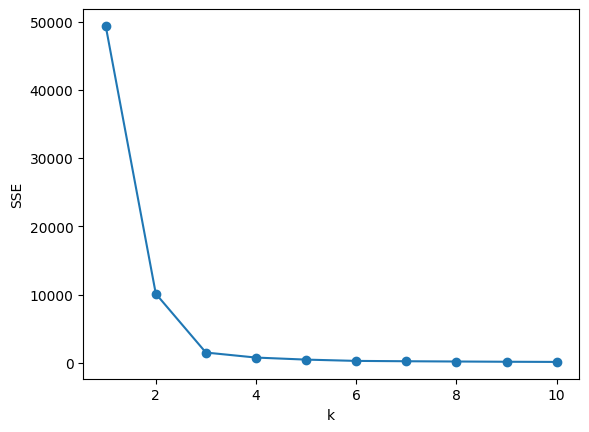

In [51]:

#Applying K-means clustering on various k values and choosing the most optimal using elbow method
# Calculate the intra-cluster variance for each K value
variance_values = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(p_data)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    variance = 0
    for i in range(k):
        variance += np.sum((p_data[labels == i] - centers[i]) ** 2)
    variance_values.append(variance)

# Plot the elbow graph
mp.clf()
mp.plot(k_range, variance_values, marker='o')
mp.xlabel('k')
mp.ylabel('SSE')
mp.show()




In [61]:
optimal_k = 5  # the optimal number of clusters based on the elbow point

# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=0)
kmeans.fit(p_data)

# Assign the cluster labels to the data points
cluster_labels = kmeans.labels_

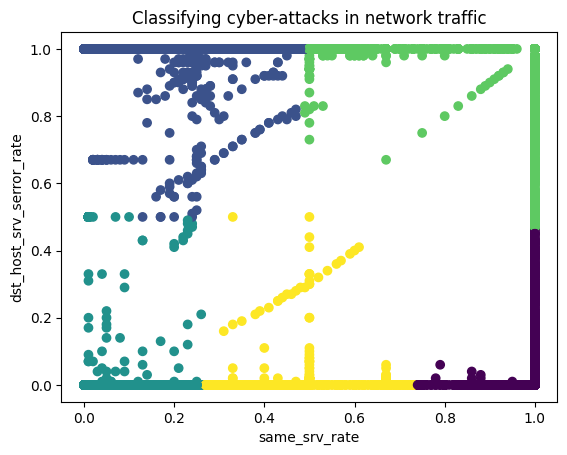

In [62]:
# Plot the data points colored by their assigned cluster labels
mp.scatter(p_data[:, 0], p_data[:, 1], c=cluster_labels, cmap='viridis')
mp.xlabel(selected_features[0])
mp.ylabel(selected_features[1])
mp.title('Classifying cyber-attacks in network traffic')
mp.show()

In [ ]:
#silhouette score